## <h1 style="text-align: center">UC Berkeley: Machine Learning and Artificial Intelligence</h1>
<h2 style="text-align: center;">Capstone Project</h2>
<h3 style="text-align: center; border: 2px dashed; padding: 25px 25px; color: blue; font-weight: bold; font-style: italic;">Is My Airline Flight Likely to be Cancelled or Diverted?</br></br><span style="text-align: center; color:black; font-size:16px; font-weight: normal; font-style: normal; ">(A Classification Problem)</br></br><strong>Student:</strong> Ameet Doshi</br><strong>Facilitator:</strong> Dr. Matilde D'Amelio</span></h3>

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">1.0 Business Understanding</h2>
    
### 1.1 Introduction
Flight delays, cancellations or diversions experienced by airline travellers are can both emotionally and physically impact the enjoyment of the planned journey, as well as create negative sentiment for the airline. 

There are a number of factors that may result in a flight being delayed, cancelled or diverted (generally, a "flight change"), including issues stemming from:
* The airline carrier
* Aircraft issues (e.g. requiring engineering resolution)
* Weather along the flight path
* The originating or destination airports (security, congestion)
* Personnel issues (e.g. staff shortage, out of flight time)

### 1.2 Business Goals and KPIs
As an airline traveller/customer, could we benefit from a deeper understanding of what conditions may cause a flight change, such that we may try to avoid those conditions when booking or rescheduling a flight?
1. Improve traveller satisfaction, and therefore airline brand sentiment, by indicating to a flight customer when a flight change may be more probable.
2. Reduce customer service representative costs, addressing flight change or dissatisfaction outreach.
3. Improve airline employee satisfaction, by reducing the potential for conflict with a customer.

Alternatively, could an airline carrier predict when one of their flights may incur a flight change based on the types of planes within its fleet, or the airports it services?

### 1.3 Data Mining Questions and Goals
1. Understand if there are any correlations between the airline carrier, individual plane, or airport to an unexpected flight change.
2. Understand if certain days of the week or month have higher propensity for flight changes.
3. Understand if flight duration plays a role in propensity for flight changes.
4. Test different classification models, measuring each's score and loss function to suggest which may be the best to classify and predict future flight changes.

### 1.4 Sourcing the Data
As [summarized by Data Society](https://data.world/data-society/airlines-delay), the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly [Air Travel Consumer Report](https://www.transportation.gov/individuals/aviation-consumer-protection/air-travel-consumer-reports), published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">2.0 Data Understanding</h2>

### 2.1 Gathering the Data
The full dataset consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 
* The data comes originally from [RITA](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ) where it is described in detail (not all features are retained from original dataset)
* For purposes of this capstone project, datasets were downloaded from the Harvard Dataverse: [Data Expo 2009: Airline on time data](https://doi.org/10.7910/DVN/HG7NV7)
* A subset of the available dataset will be used for performance and manageability considerations (for 2008), which contains approximately 2.4MM records with 29 features. 

### 2.2 Feature (column) Descriptions
| Feature           | Values | Comments |
| :---------------- | :------ | :----: |
| Year       |   1987-2008   | _for full dataset, a subset is used for performance_ |
| Month       |   1-12   |  |
| DayofMonth       |   1-31   |  |
| DayOfWeek       |   1 (Monday) - 7 (Sunday)   |  |
| DepTime       |   actual departure time (local, hhm m)   |  |
| CRSDepTime       |   scheduled departure time (local, hhmm)   |  |
| ArrTime       |   actual arrival time (local, hhmm)   |  |
| CRSArrTime       |   scheduled arrival time (local, hhmm)   |  |
| UniqueCarrier       |   unique carrier code   |  |
| FlightNum       |   flight number   |  |
| TailNum       |   plane tail number   |  |
| ActualElapsedTime       |   in minutes   |  |
| CRSElapsedTime       |   in minutes   |  |
| AirTime       |   in minutes   |  |
| ArrDelay       |   arrival delay, in minutes   |  |
| DepDelay       |   departure delay, in minutes   |  |
| Origin       |   origin IATA airport code   |  |
| Dest       |   destination IATA airport code   |  |
| Distance       |   in miles   |  |
| TaxiIn       |   taxi in time, in minutes   |  |
| TaxiOut       |   taxi out time, in minutes   |  |
| Cancelled       |   was the flight cancelled?   |  |
| CancellationCode       |   reason for cancellation    | (A = carrier, B = weather, C = NAS, D = security) |
| Diverted       |   1 = yes, 0 = no   |  |
| CarrierDelay       |   in minutes   |  |
| WeatherDelay       |   in minutes   |  |
| NASDelay       |   in minutes   |  |
| SecurityDelay       |   in minutes   |  |
| LateAircraftDelay       |   in minutes   |  |

### 2.3 Prepare the Environment and Notebook
* Import relevant packages and modules, and set any needed configurations 
* Load the data
* Sanitize and optimize the dataframe as needed (for data exploration and pre-processing)

#### 2.3.1 Import Packages

In [1]:
import time
import pickle
import warnings
import os

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# Address the imbalanced classes
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay, classification_report

from sklearn import set_config


Defaulting to user installation because normal site-packages is not writeable


#### 2.3.2 Environment Configurations

In [2]:
# Default plot figure sizes
plt.rcParams["figure.figsize"] = (16, 5)

# Pipeline configuration visualization
set_config(display="diagram")

# Silence any warnings
#warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# see all columns
#pd.options.display.max_columns = 50
pd.set_option('display.max_columns', None)

#### 2.3.3 Load Data
***Note:*** _For performance and manageability considerations, only using 2008 dataset, though a later test may use 2007 dataset as a validation set_

In [3]:
# There are numerous years of data available on the Harvard 
df = pd.read_csv("data/dataset-harvard-delayed-flights-2008.csv.bz2", compression="bz2", sep=",")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0000,1325,1451.0000,1435,WN,588,N240WN,68.0000,70.0000,55.0000,16.0000,18.0000,HOU,LIT,393,4.0000,9.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000
1,2008,1,3,4,1125.0000,1120,1247.0000,1245,WN,1343,N523SW,82.0000,85.0000,71.0000,2.0000,5.0000,HOU,MAF,441,3.0000,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0000,2015,2136.0000,2140,WN,3841,N280WN,87.0000,85.0000,71.0000,-4.0000,-6.0000,HOU,MAF,441,2.0000,14.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0000,855,1203.0000,1205,WN,3,N308SA,120.0000,130.0000,108.0000,-2.0000,8.0000,HOU,MCO,848,5.0000,7.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0000,1400,1726.0000,1710,WN,25,N462WN,123.0000,130.0000,107.0000,16.0000,23.0000,HOU,MCO,848,6.0000,10.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000


#### 2.3.4 Sanitize and optimize dataframe
These updates to the dataframe column names and data types will aide efficiency in later preparation and modeling steps.

##### 2.3.4.1 Sanitize column names

In [4]:
# sanitize and standardize column names for ease of reference
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.head(1)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,1343.0000,1325,1451.0000,1435,WN,588,N240WN,68.0000,70.0000,55.0000,16.0000,18.0000,HOU,LIT,393,4.0000,9.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000


##### 2.3.4.2 Optimize dataframe data types for memory/performance

Use the `dtype-diet` package to evaluate the initial data types for each dataframe feature, and recommend more memory and disk efficient data type casting to improve runtime performance. 

In [5]:
!pip install dtype-diet

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from dtype_diet import report_on_dataframe

'''
Use `report_on_dataframe()` method to evaluate the values for each column
and recommend a dtype that still quantifies the value set, while reducing memory usage.
'''
df_dtype_analyze = report_on_dataframe(df)
df_dtype_analyze

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
year,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
month,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
dayofmonth,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
dayofweek,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
deptime,float64,float32,9332.9414,4666.5020,4666.4395,49.9997
crsdeptime,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
arrtime,float64,float32,9332.9414,4666.5020,4666.4395,49.9997
crsarrtime,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
uniquecarrier,object,category,68830.0444,1167.5200,67662.5244,98.3038


In [7]:
'''
Using the dtype_diet.optimize_dataframe() seems to change some values
simply by applying it's recommended dtypes to the dataframe. 

Taking a snapshot of the memory for the dataframe object before and after to
indicate memory savings
'''
# convert the proposed dtypes per column into a dictionary
dict_dtypes_opt = df_dtype_analyze["Proposed dtype"].to_dict()

# get initial memory 
initial_memory = df.memory_usage(deep=True).sum()

# update dtypes, saving to a new dataframe
df_opt = df.astype(dict_dtypes_opt)

# determin how much memory was saved
final_memory = df_opt.memory_usage(deep=True).sum()
memory_savings = (initial_memory - final_memory) / initial_memory * 100

print(f"Memory usage before: {initial_memory/(1024**2)} bytes")
print(f"Memory usage after: {final_memory/(1024**2)} bytes")
print(f"Memory savings: {memory_savings:.2f}%")

Memory usage before: 1062.1283693313599 bytes
Memory usage after: 134.91320610046387 bytes
Memory savings: 87.30%


---

***💡 Insights:***
* Memory allocation was reduced by **87.3%** for the same dataset, simply by optimizing data types!
* This exercise can significantly improve modeling performance with larger datasets, at scale.

---

##### 2.3.4.3 Review the new Dataframe
* confirm sanitized column names
* confirm optimized data types (and reduced memory footprint; no data was lost in this process)

In [8]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype   
---  ------             -----   
 0   year               int16   
 1   month              int8    
 2   dayofmonth         int8    
 3   dayofweek          int8    
 4   deptime            float32 
 5   crsdeptime         int16   
 6   arrtime            float32 
 7   crsarrtime         int16   
 8   uniquecarrier      category
 9   flightnum          int16   
 10  tailnum            category
 11  actualelapsedtime  float16 
 12  crselapsedtime     float16 
 13  airtime            float16 
 14  arrdelay           float32 
 15  depdelay           float32 
 16  origin             category
 17  dest               category
 18  distance           int16   
 19  taxiin             float16 
 20  taxiout            float16 
 21  cancelled          int8    
 22  cancellationcode   category
 23  diverted           int8    
 24  carrierdelay       float

#### 2.3.5 Custom Python Helper Functions

##### helper_print_heading()

In [9]:
def helper_print_heading ( heading, length = 120 ):
    '''
    Purpose: Uniform means to add a heading to printed information
    Inputs:
    - heading: string to use for heading, uppercased by default
    - length: override overall width consumed by title and dashes
    '''
    padding = int(( length - len(heading) - 6 ) / 2 )
    return '\n/' + ('─' * padding) + f'  {heading.upper()}  ' + ('─' * padding) + "/\n"



##### review_missing_data()

In [10]:
def review_missing_data( dataframe ):
    '''
    Purpose: Review missing values and duplicated records for the `dataframe` provided
    Function: 
        - tabular view to understand missing data by feature
        - bar chart view to visualize percentage missing values by feature
        - heatmap view to understand distribution of missing data
        - indicate what percentage of original data is lost if all missing values are dropped
            
    Inputs:
        - dataframe: dataframe being reviewed for missing data

    
    '''
    
    df_missing_sum = dataframe.isna().sum()
    df_missing_perc = round(dataframe.isna().mean()*100, 3)
    df_integrity = pd.DataFrame( { "Missing Values": df_missing_sum, 
                                  "Percentage": df_missing_perc }
                               ).sort_values("Percentage", ascending=False)
    
    
    # Indicate how much data is lost if all missing data is dropped
    rows_orig = df_opt.shape[0]
    rows_dropna = df_opt.dropna().shape[0]
    print( helper_print_heading( 'Missing Data and Duplicated Records in Dataset' ), 
          f"\nPercentage of original data lost if all missing data is dropped: {(rows_orig - rows_dropna)/rows_orig * 100:.2f}%",
          f"\nNumber of duplicated records in dataset: {dataframe.duplicated().sum()}" )
 
    # tabular view of missing data by feature
    print( helper_print_heading( 'Total Missing Values by Feature' ))
    display( df_integrity )
    
    df_integrity["Percentage"].plot(kind="bar", title="Percentage Data Missing by Feature")
    plt.ylabel("Percent (%)")
    plt.xlabel("Data Features Within Dataset")
    plt.show()
    
    # Let's visually evaluate the missing data across any data feature to understand distribution, 
    # for any additional insights
    sns.heatmap(dataframe.isna()).set_title("Heatmap Visualizing the Spread of Missing Data")
    plt.xlabel("Data Features")
    plt.ylabel("Observation Number")
    plt.show()

##### triangle_correlation_heatmap()

In [11]:
def triangle_correlation_heatmap( dataframe, spotlight = False ):
    '''
    Purpose: Review multicollinearity of features within the `dataframe` provided
    Function: 
        - heatmap view to understand correlation between features within the `dataframe`
        - masks the view
        - if spotlight is True, only illuminates correlation values over absolute value of 85%
            
    Inputs:
        - dataframe: dataframe being reviewed for heatmap
        - spotlight: indicate if only high multicollinear relationships should be shown

    
    '''
    corr_threshold = 0.85   # 85% correlation
    
    corr = dataframe.corr( numeric_only=True )
    mask = np.triu( np.ones_like( corr.round(2) ))
    plt.figure(figsize=(20,20))

    # If spotlighting is desired, filter out any correlation (absolute) values below the threshold
    if spotlight == True:
        corr = corr[ abs(corr) > corr_threshold ]
    
    sns.heatmap( corr, mask=mask, annot=True ) \
                .set_title("Heatmap Visualizing Correlation Between Numerical Features")
    
    plt.show()


##### create_target_feature()

In [12]:
def create_target_feature ( cancelled, diverted ):
    '''
    Purpose: Engineer the target feature, determining target class values based on features passed into the function
    Function: 
        - Reviews if the flight was cancelled, diverted, otherwise classifies as 'on-schedule'
        - Presumes the `cancelled` and `diverted` features will not both be True (=1)
        - TODO: Later, perhaps introduce `delay` status
        - Returned value map:
            0 => on-schedule
            1 => diverted
            1 => cancelled
    Inputs:
        - cancelled: existing feature value with binary value, indicating if the flight was cancelled or not
        - diverted: existing feature value with binary value, indicating if the flight was diverted or not
    '''    
    if cancelled == 1:
        return 1       # 'cancelled'
    elif diverted == 1:
        return 1       # 'diverted'
    else:
        return 0       # 'on-schedule'


##### sanitize_coef_labels()

In [13]:
def sanitize_coef_labels( label ):
    '''
    Purpose: Features transformed as part of a pipeline will have the pipeline element's label 
                prepended to indicate which transformer was responsible for creating it. This 
                function strips the prefixes and makes the label more digestible.
    Function: 
        - Removes "ohe__" prefix
        - Removes "poly__" prefix
            
    Inputs:
    - label: current feature label name for the coefficient

    Returns:
    - updated label name
    '''
    return label.replace( "ohe__", "" ) \
                .replace( "poly__", "" ) \
                .replace( "onehotencoder__", "" ) \
                .replace( "remainder__", "" ) \
                .replace( " ", " * " ) \
                .strip()

##### profileFeatureAndTarget()

In [14]:
def profileFeatureAndTarget ( dataframe, feature ):
    '''
    
    '''
    target_0 = pd.DataFrame( dataframe.query('flight_outcome == 0') \
                                .groupby( [feature] ).size()) \
                                .reset_index().rename( columns={0: 'Count'} )

    # How many flights per carrier either cancelled or diverted? 
    target_1 = pd.DataFrame( dataframe.query('flight_outcome == 1') \
                                .groupby( [feature] ).size()) \
                                .reset_index().rename( columns={0: 'Count'} )

    # Create single view of both target classes
    target = pd.merge( target_0, target_1, on=feature ) \
                                .rename( columns={ 
                                    'Count_x': 'On-Schedule', 
                                    'Count_y': 'Cancelled/Diverted' 
                                })

    # Create ratio feature to use in sorting
    target[ 'percentChanged' ] = target[ 'Cancelled/Diverted' ] / ( target[ 'Cancelled/Diverted' ] + target[ 'On-Schedule' ] ) * 100

    # display the dataframe of results
    display( target.sort_values( 'percentChanged', ascending=False ).head( 10 ))

    # visualize (later TODO)

    return target
    

##### gridsearch_model()

In [15]:
def gridsearch_model( estimator, params, X_train, X_test, y_train, y_test, label, shorthand ):
    '''
    Purpose: iterate through different scoring functions for the estimator, to determine which (if any have better scores)
    Inputs:
        - estimator: Model to fit and test
        - params: Hyperparameters to grid search
        - X_train: Training feature dataset
        - y_train: Training outcome dataset
        - X_test: Validation feature dataset
        - y_test: Validation outcome dataset
        - label: Reporting label to identify the modeling test
        - shorthand: Initials of model name, for reporting
    Returns:
        Dataframe of grid search results by model and performance metric, for evaluation
    '''

    # for purposes of this exercise, let's just focus on `precision`
    #scores = [ "accuracy", "precision", "recall", "f1" ]
    scores = [ "precision" ]
    
    for score in scores:
        start_time = time.time()

        # Since we're in an iterative loop of models, give feedback of where in step the process is:
        print(f"\n\nStarting grid search for '{label}' using '{score}' scoring... ")
        grid = GridSearchCV( 
                 estimator = estimator,
                 param_grid = params,
                 scoring = score,
                 verbose = 0,
                 cv = 3
               )
        
        grid.fit( X_train, y_train )

        train_score = grid.best_estimator_.score( X_train, y_train )
        test_score = grid.best_estimator_.score( X_test, y_test )

        train_mse = mean_squared_error( grid.best_estimator_.predict( X_train ), y_train )
        test_mse = mean_squared_error( grid.best_estimator_.predict( X_test ), y_test )
        fit_time = pd.DataFrame(grid.cv_results_)["mean_fit_time"].sum()
        cv_time = time.time() - start_time
        
        # Add scoring to results dataframe
        results_df.loc[f"{shorthand} - {score}"] = [label, score, round(train_score, 4), round(test_score, 4), round(train_mse, 4), round(test_mse, 4), round(cv_time, 4), round(fit_time, 4), grid.best_params_]

        # store the updated results_df dataframe at each iteration
        %store results_df

        # Screen output for immediate feedback
        print(f" ... DONE! ({cv_time} seconds)",
              f"\nModel: {label}",
              f"\nScorer: {score}",
              f"\nTrain Score: {round(train_score, 4)}",
              f"\nTest Score: {round(test_score, 4)}",
              f"\nTrain MSE: {round(train_mse, 4)}",
              f"\nTest MSE: {round(test_mse, 4)}",
              f"\nFit Time: {round(fit_time, 4)}",
              f"\nBest Params: {grid.best_params_}"
             )

    return pd.DataFrame(grid.cv_results_).sort_values("rank_test_score")



##### test_models()

In [16]:
def test_models( X_train, X_test, y_train, y_test, label, models = [] ):
    '''
    Expects:
    * X_train, X_test, y_train, y_test: pre-processed data to model
    * df_label: What to call the dataset
    * models: list of which modelConfigurations indexes are desired to test
        - optional, if empty list all models defined in modelConfiguration will be tested
    '''
    # Verify if models were specified to test, or test them all by default
    models_all = list(modelConfigurations.keys())
    
    if len(models) == 0:
        models = models_all
        print(f"no models provided, testing whole set: {models}")

    # Iterate over each model to test, but confirm it's a valid model option
    for model in models:
        if models_all.count( model ) == 1:
            # Known model key, advancing
            testModel = modelConfigurations[model]
            gridsearch_model( testModel["pipe"], testModel["params"], X_train, X_test, y_train, y_test, testModel["label"], model )
        else:
            print( f'Model "{model}" not found, ignoring' )
    

##### evaluate_confusion_matrix()

In [17]:
def evaluate_confusion_matrix( y_pred, y_true ):
    '''
    Purpose: Visualize confusion matrix from predicted and true target class values
    Inputs:
        - y_pred: Predicted target feature outcomes
        - y_true: Actual target feature outcomes
    Returns:
        - Shows heatmap of confusion matrix results
        - Returns confusion matrix values:
            * tn: True Negative
            * fp: False Positive
            * fn: False Negative
            * tp: True Positive
        
    '''

    # Create confusion matrix
    cm = confusion_matrix( y_true, y_pred )
    
    # Plot the confusion matrix using seaborn
    disp = ConfusionMatrixDisplay( confusion_matrix=cm )
    disp.plot()
    plt.xlabel( 'Predicted Labels' )
    plt.ylabel( 'True Labels' )
    plt.show()

    # Extract TN, FP, FN, TP from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    return tn, fp, fn, tp
    

---


### 2.4 Explore the Data (EDA)
* Data integrity review
* Univariate analysis
* Bivariate analysis
* Observations and conclusions

#### 2.4.1 Data Integrity Review


/──────────────────────────────────  MISSING DATA AND DUPLICATED RECORDS IN DATASET  ──────────────────────────────────/
 
Percentage of original data lost if all missing data is dropped: 100.00% 
Number of duplicated records in dataset: 4

/─────────────────────────────────────────  TOTAL MISSING VALUES BY FEATURE  ─────────────────────────────────────────/



,Missing Values,Percentage
cancellationcode,2324775,97.3030
lateaircraftdelay,1804634,75.5320
securitydelay,1804634,75.5320
nasdelay,1804634,75.5320
weatherdelay,1804634,75.5320
carrierdelay,1804634,75.5320
actualelapsedtime,70096,2.9340
taxiin,70096,2.9340
airtime,70096,2.9340
arrdelay,70096,2.9340


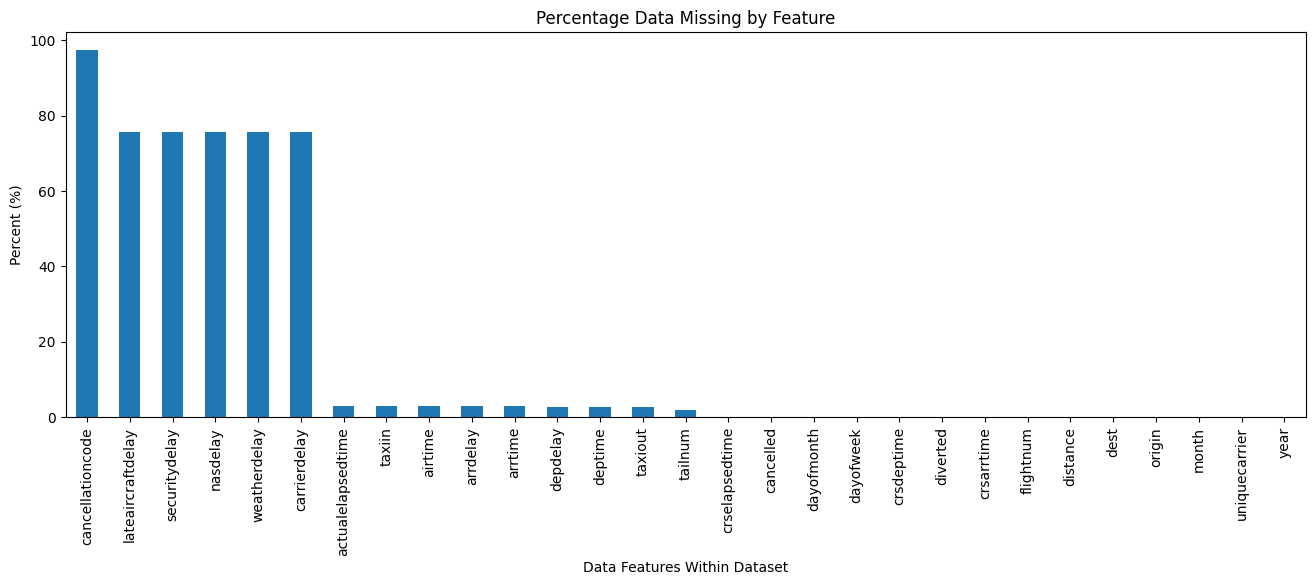

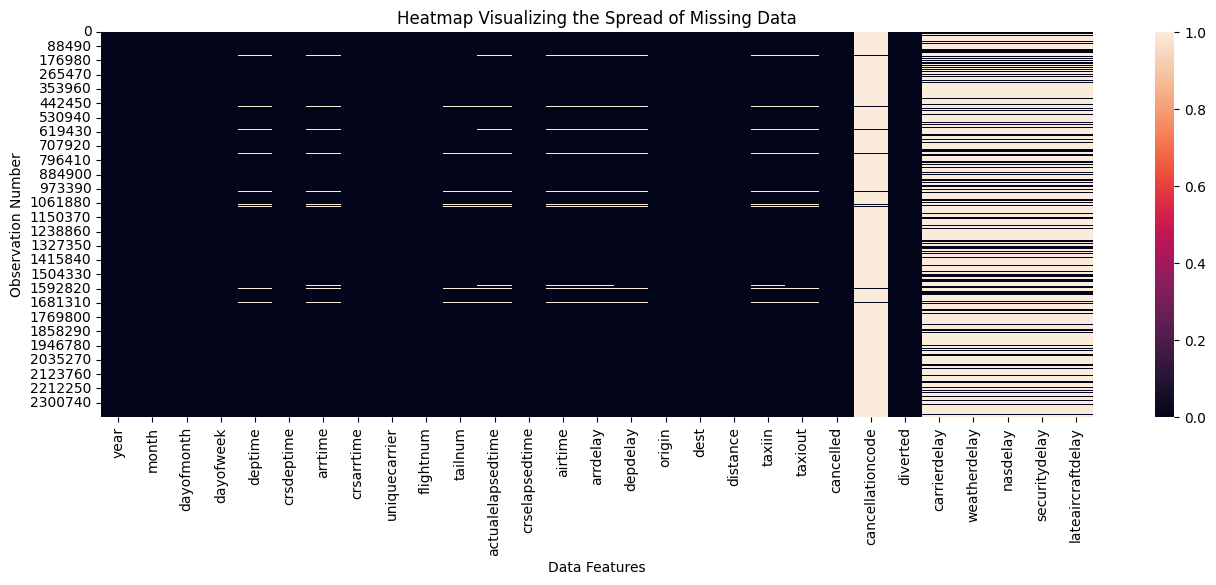

In [18]:
# Review missing values and duplicated records using the Custom Function `review_missing_data()` (defined above)

review_missing_data( df_opt )

In [19]:
'''
Initial Shape of Dataset
'''
original_shape = df_opt.shape
original_shape

(2389217, 29)

In [20]:
'''
Review numerical features (data type of int* or float*) to understand:
- If scaling of numerical data is needed when modeling
- If any outliers should be pruned from the dataset
- If any features should be coerced to other formats
'''
df_opt.describe( [.1, .2, .85, .98, .99] ).T

,count,mean,std,min,10%,20%,50%,85%,98%,99%,max
year,2389217.0000,2008.0000,0.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000
month,2389217.0000,2.5050,1.1215,1.0000,1.0000,1.0000,3.0000,4.0000,4.0000,4.0000,4.0000
dayofmonth,2389217.0000,15.6639,8.7504,1.0000,4.0000,7.0000,16.0000,26.0000,30.0000,31.0000,31.0000
dayofweek,2389217.0000,3.9096,1.9804,1.0000,1.0000,2.0000,4.0000,6.0000,7.0000,7.0000,7.0000
deptime,2324775.0000,1340.0184,480.2717,1.0000,707.0000,844.0000,1330.0000,1913.0000,2215.0000,2248.0000,2400.0000
crsdeptime,2389217.0000,1329.9923,465.7833,0.0000,706.0000,840.0000,1325.0000,1900.0000,2150.0000,2230.0000,2359.0000
arrtime,2319121.0000,1485.8350,508.1295,1.0000,836.0000,1022.0000,1516.0000,2049.0000,2323.0000,2340.0000,2400.0000
crsarrtime,2389217.0000,1496.7440,484.5238,1.0000,848.0000,1030.0000,1520.0000,2045.0000,2320.0000,2340.0000,2400.0000
flightnum,2389217.0000,2213.8880,1951.3921,1.0000,235.0000,482.0000,1544.0000,4647.0000,7070.0000,7267.0000,9741.0000
actualelapsedtime,2319121.0000,NaN,NaN,14.0000,60.0000,72.0000,111.0000,193.0000,330.0000,361.0000,905.0000


In [21]:
'''
Review categorical features (data type of category) to understand:
- How many unique values for each feature, as evaluation for binarization
- If any features should be coerced or engineered into more useful data points or types
'''
df_opt.describe( include='category' ).T

,count,unique,top,freq
uniquecarrier,2389217,20,WN,398966
tailnum,2346765,5031,N693BR,1526
origin,2389217,291,ATL,137014
dest,2389217,293,ATL,136950
cancellationcode,64442,4,A,26075


---

***💡 Insights: Data Integrity Review***
* **Missing Data**
    * _NaNs_ for `*delay` features are expected, as they only exist when the delay is in excess of 30 minutes, and can therefore be backfilled with `0.0` values.
    * _NaNs_ for `cancellationcode` is also expected (should only populate when cancelled), those will backfill with a default value, `N`.
    * Other missing values will need to be evaluated by feature for imputation or removal.
* **Numerical Features**
    * Based on varying orders of magnitude in numerical feature means, scaling of numerical features will be necessary when creating model pipelines.
    * Engineer higher order features (`PolynomialFeatures()`) to understand their predictive power within models.
* **Categorical Features**
    * According to an [Ashville Regional Airport article](https://flyavl.com/article/every-tail-tells-tale#:~:text=Every%20airplane%20has%20its%20own,is%20a%20paperwork%20intensive%20process.), `tailnum` is unique per aircraft currently in service. While less valuable to binarize (many unique values), it may be useful as a grouping feature to understand if a specific aircraft experiences more flight changes.
    * `uniquecarrier` will be binarized to determine if any airline companies are more prone to flight changes.
    * `origin` and `destination` may be considered for binarization, as it's quite possible certain airports may contribute greater than others, to flight changes.
    * `cancellationcode`, while it has expected missing values (when flight was completed as planned), the _NaN_ values will be imputed (backfill to "_N_"), and then binarized for more granular flight change understanding.
    * _Note:_ Binarization should be completed prior to bivariate analysis to understand correlations.
* **Target Feature**
    * The target feature does not exist as a column already, and thus must be engineered from other features (`cancelled`, `diverted`).

---

#### 2.4.3 Univariate Analysis
* Distribution of Categorical Features
* Distribution of Numerical Features

In [22]:
'''
Create lists for numerical and categorical feature names
Drop the following features due to high number of unique values, which will not be useful in modeling:
    * tailnum
    * 
'''
cols_num = df_opt.select_dtypes( exclude=[ "category" ] ).columns.tolist()
cols_cat = df_opt.drop(['tailnum'], axis=1).select_dtypes( include=[ "category" ] ).columns.tolist()

# cols_num, cols_cat, display(df_opt.info())


/──────────────────────────────────────────────  FEATURE: UNIQUECARRIER  ──────────────────────────────────────────────/



,uniquecarrier,proportion
0,WN,0.1670
1,AA,0.0856
2,OO,0.0817
3,MQ,0.0703
4,UA,0.0645
5,US,0.0643
6,DL,0.0634
7,XE,0.0581
8,NW,0.0514
9,CO,0.0430


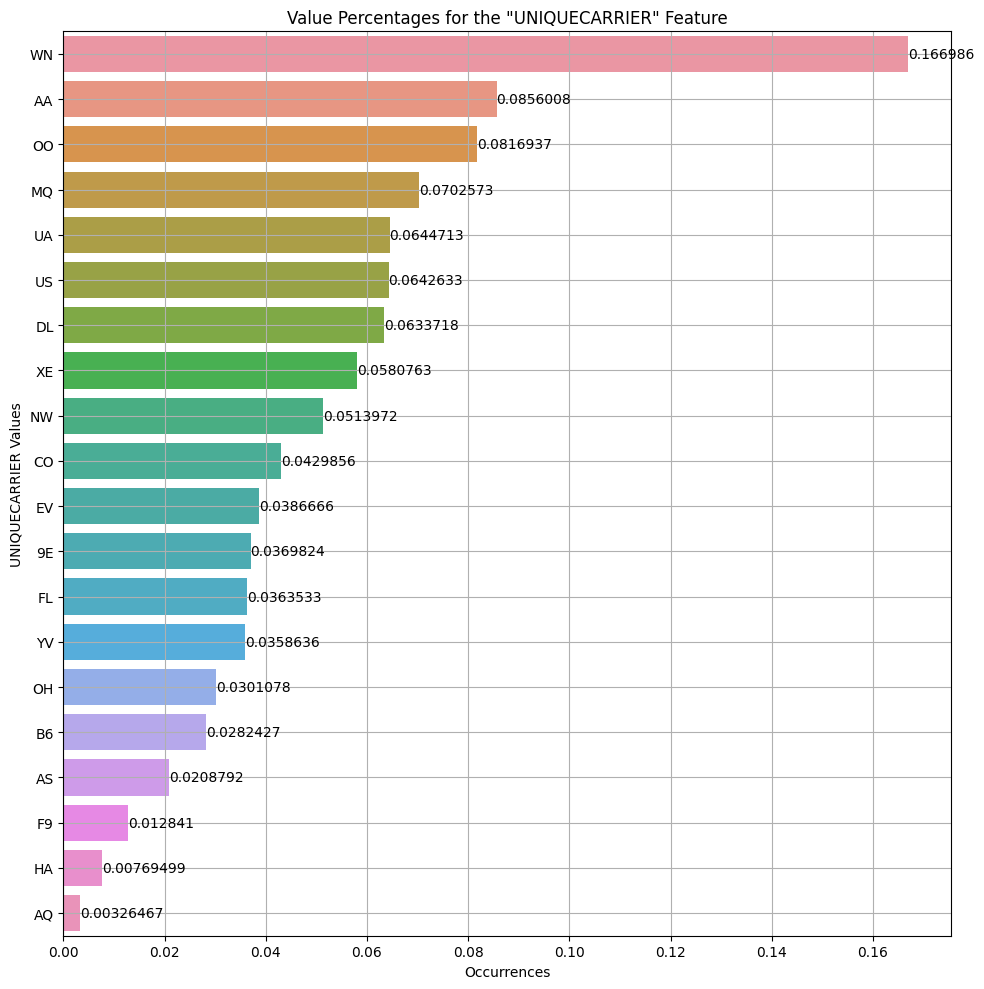


/─────────────────────────────────────────────────  FEATURE: ORIGIN  ─────────────────────────────────────────────────/



,origin,proportion
0,ATL,0.0573
1,ORD,0.0494
2,DFW,0.0389
3,DEN,0.0328
4,LAX,0.0308
5,PHX,0.0290
6,IAH,0.0262
7,LAS,0.0250
8,DTW,0.0235
9,EWR,0.0205


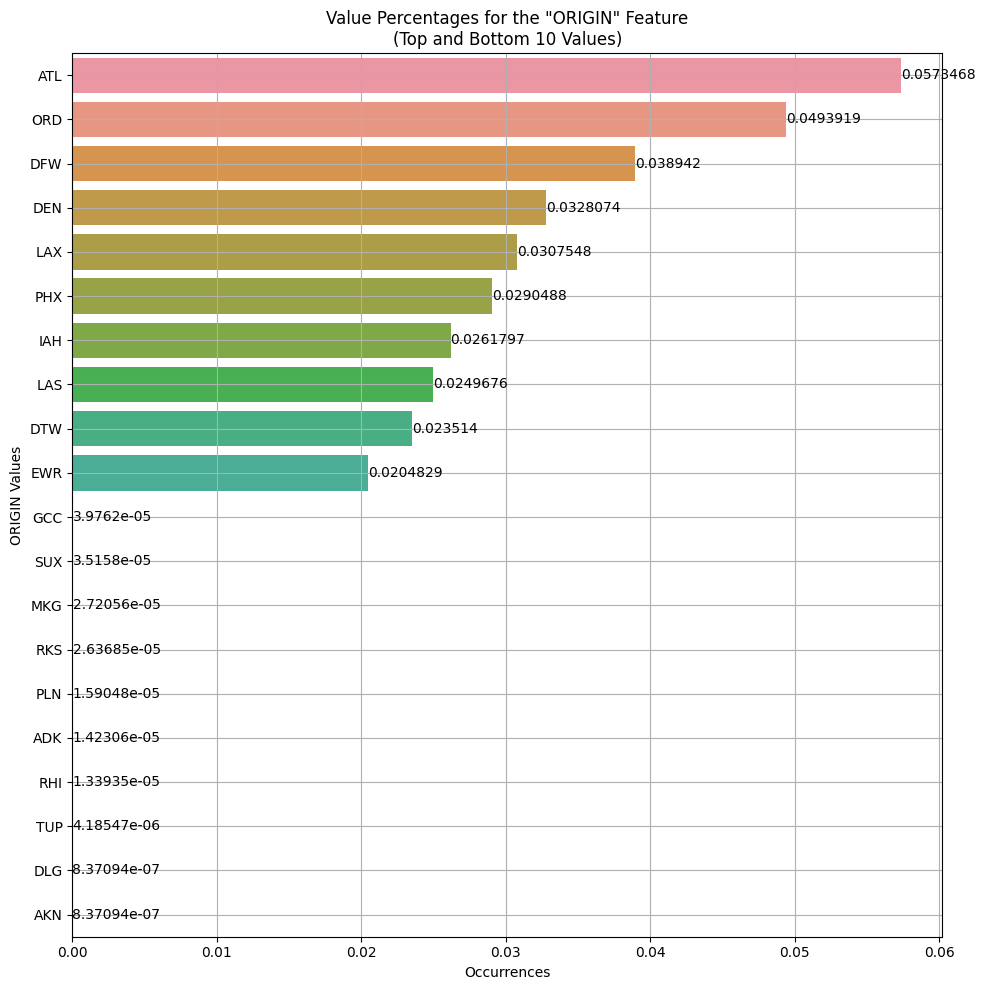


/──────────────────────────────────────────────────  FEATURE: DEST  ──────────────────────────────────────────────────/



,dest,proportion
0,ATL,0.0573
1,ORD,0.0494
2,DFW,0.0390
3,DEN,0.0328
4,LAX,0.0308
5,PHX,0.0290
6,IAH,0.0262
7,LAS,0.0250
8,DTW,0.0235
9,EWR,0.0205


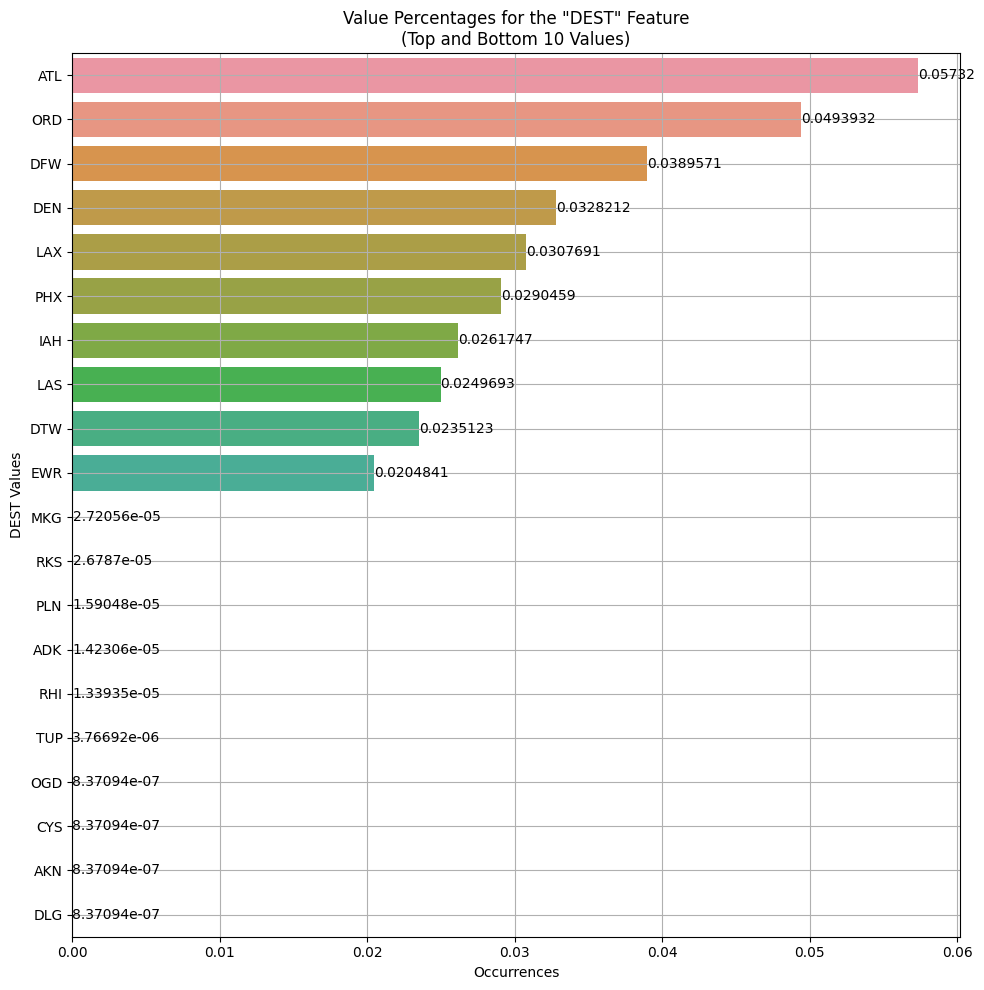


/────────────────────────────────────────────  FEATURE: CANCELLATIONCODE  ────────────────────────────────────────────/



,cancellationcode,proportion
0,NaN,0.9730
1,A,0.0109
2,B,0.0108
3,C,0.0053
4,D,0.0000


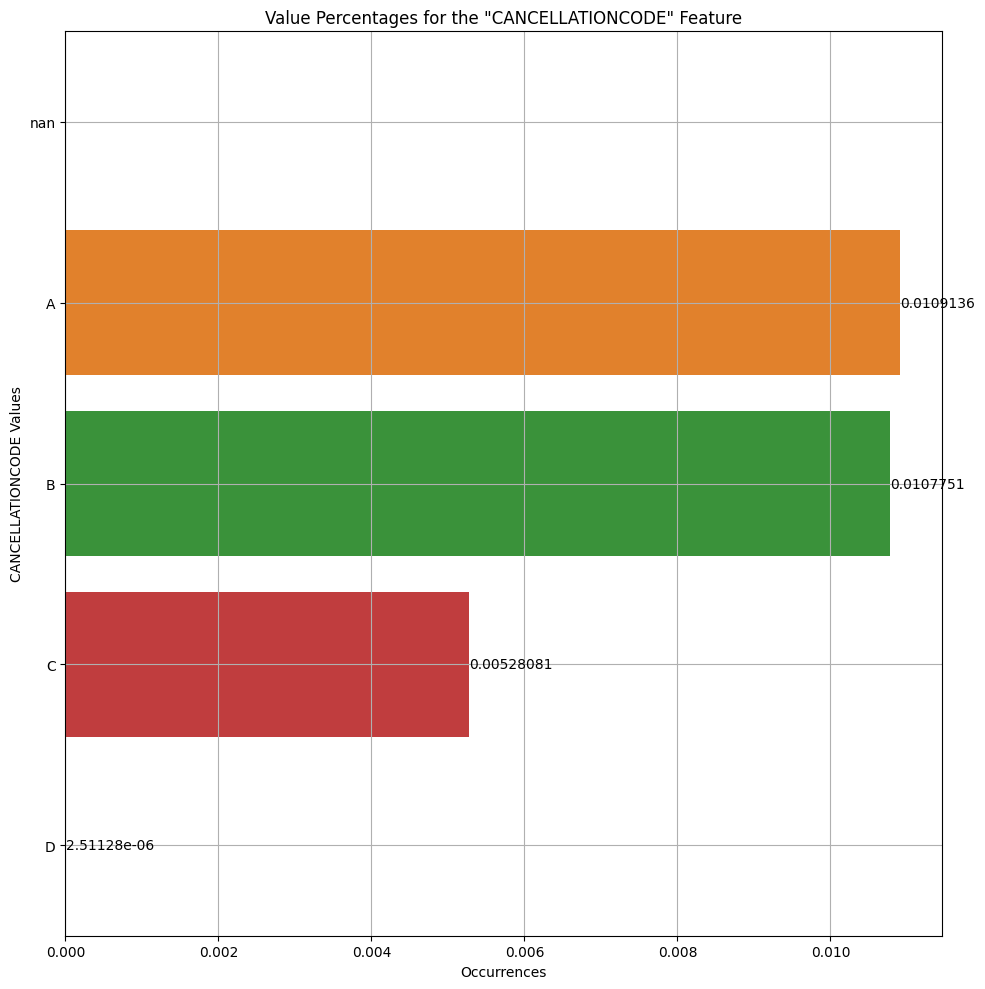

In [23]:
'''
Iterate over the categorical features:
    * Get it's unique values and counts for each
    * Plot the value counts to understand distribution
    * If the number of unique values exceeds 20 for a feature, show it's top and bottom 10 values
'''
display_threshold = 20

for cmv in cols_cat:
    df_cmv = pd.DataFrame( df_opt[cmv].value_counts( dropna=False, normalize=True )).reset_index()
    print( helper_print_heading( f'Feature: {cmv}' ))
    plt_title = ''

    # If the number of unique values exceeds the display threshold, visualize the top and bottom 10 value counts
    # to indicate distribution and scale
    if len(df_cmv) > display_threshold:
        df_cmv = pd.concat( [df_cmv.head( int( display_threshold / 2 )), df_cmv.tail( int( display_threshold / 2 ))] )
        plt_title = '\n(Top and Bottom 10 Values)'
        
    display( df_cmv )
    plt.figure( figsize=(10,10))
    ax = sns.barplot( data=df_cmv, x='proportion', y=cmv, orient='h', order=df_cmv[cmv] )
    ax.bar_label( ax.containers[0] )
    plt.title(f'Value Percentages for the "{cmv.upper()}" Feature{plt_title}' )
    plt.ylabel(f'{cmv.upper()} Values')
    plt.xlabel('Occurrences')
    plt.tight_layout()
    plt.grid()
    plt.savefig(f'images/capstone-univariate-categorical-top10-plot-{cmv.lower()}.png')
    plt.show()



/──────────────────────────────────────────────────  FEATURE: YEAR  ──────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
RangeIndex: 2389217 entries, 0 to 2389216
Series name: year
Non-Null Count    Dtype
--------------    -----
2389217 non-null  int64
dtypes: int64(1)
memory usage: 18.2 MB


None

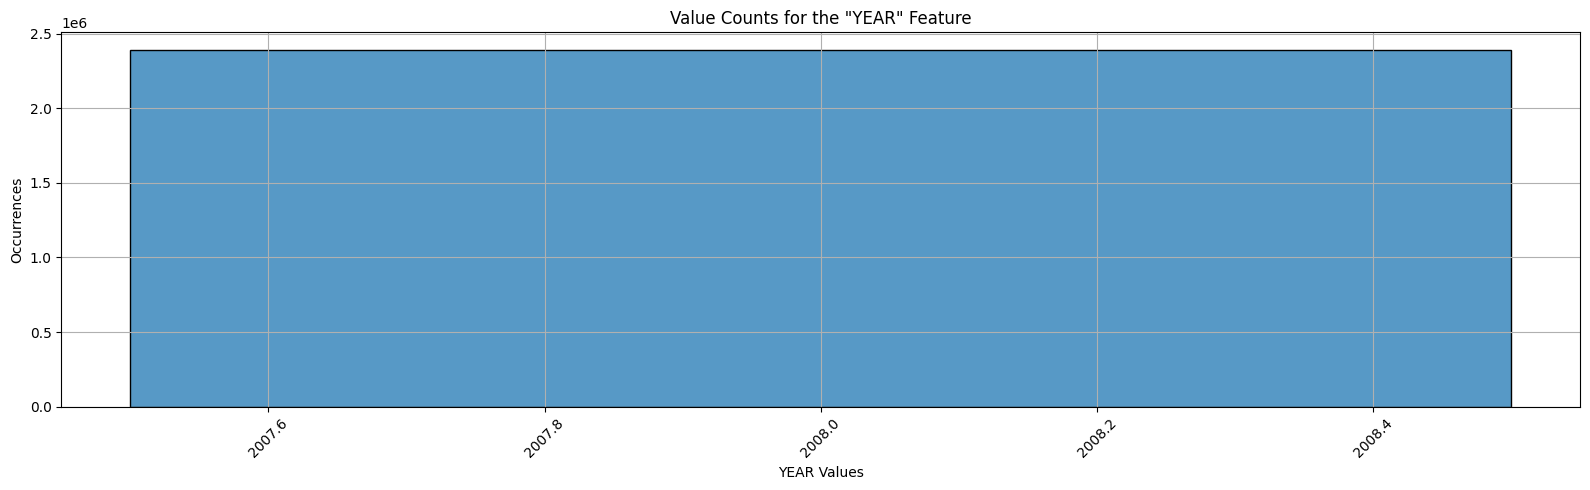


/──────────────────────────────────────────────────  FEATURE: MONTH  ──────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
RangeIndex: 2389217 entries, 0 to 2389216
Series name: month
Non-Null Count    Dtype
--------------    -----
2389217 non-null  int64
dtypes: int64(1)
memory usage: 18.2 MB


None

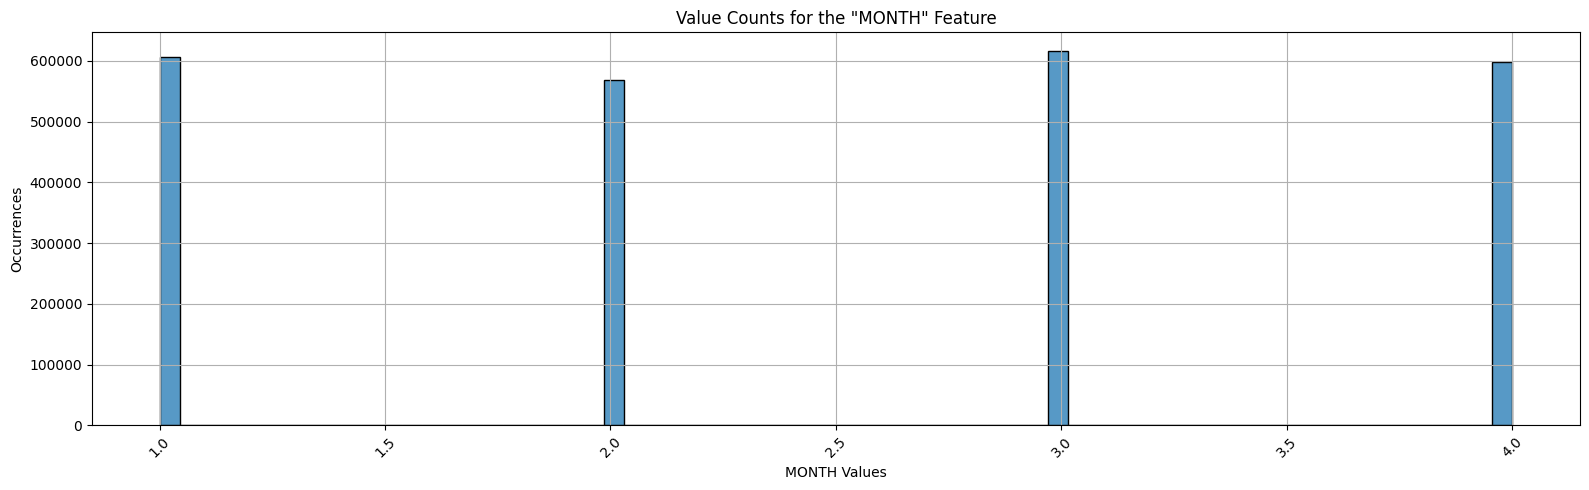


/───────────────────────────────────────────────  FEATURE: DAYOFMONTH  ───────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
RangeIndex: 2389217 entries, 0 to 2389216
Series name: dayofmonth
Non-Null Count    Dtype
--------------    -----
2389217 non-null  int64
dtypes: int64(1)
memory usage: 18.2 MB


None

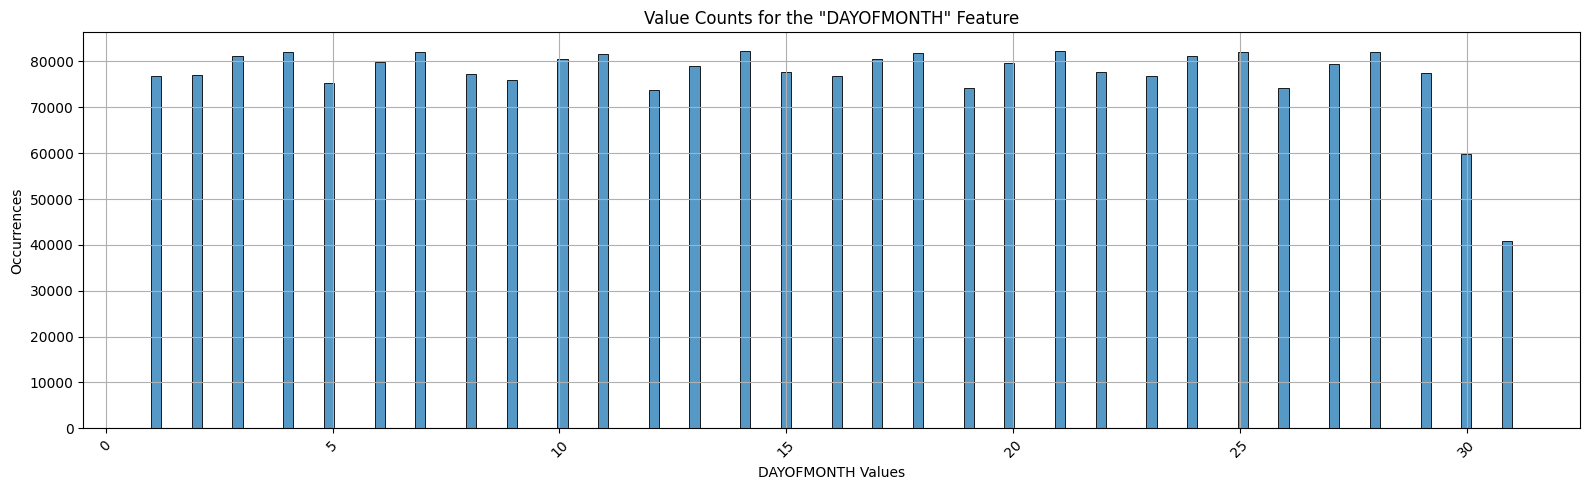


/────────────────────────────────────────────────  FEATURE: DAYOFWEEK  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
RangeIndex: 2389217 entries, 0 to 2389216
Series name: dayofweek
Non-Null Count    Dtype
--------------    -----
2389217 non-null  int64
dtypes: int64(1)
memory usage: 18.2 MB


None

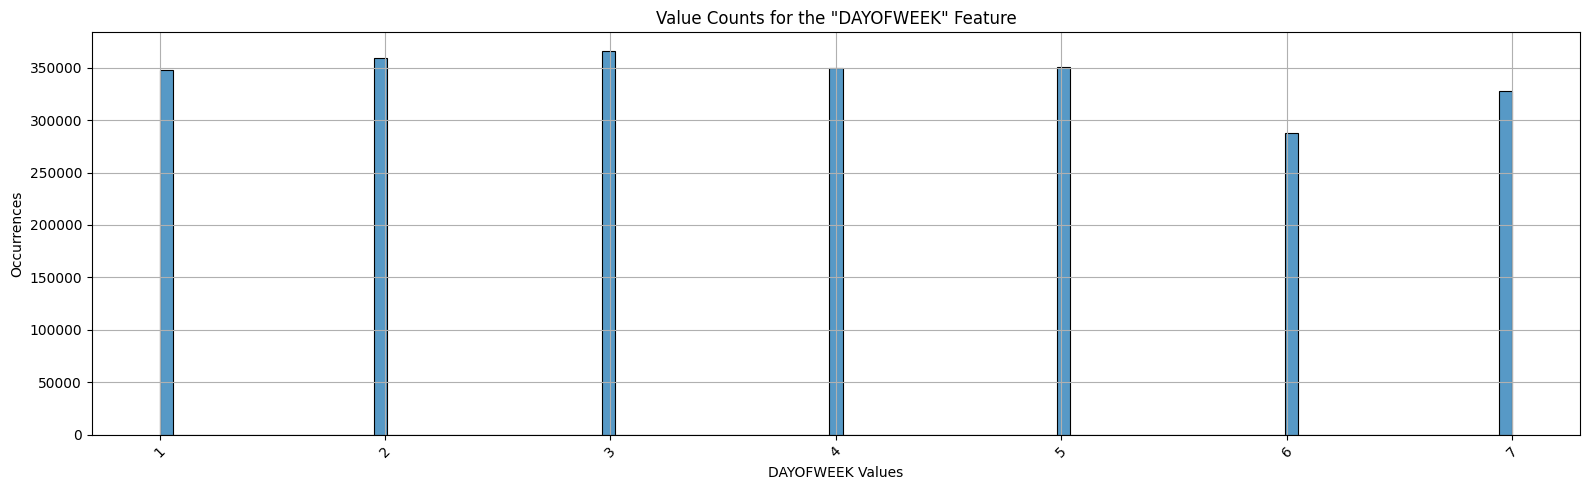


/─────────────────────────────────────────────────  FEATURE: DEPTIME  ─────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2278789 entries, 0 to 2389216
Series name: deptime
Non-Null Count    Dtype  
--------------    -----  
2278789 non-null  float64
dtypes: float64(1)
memory usage: 34.8 MB


None

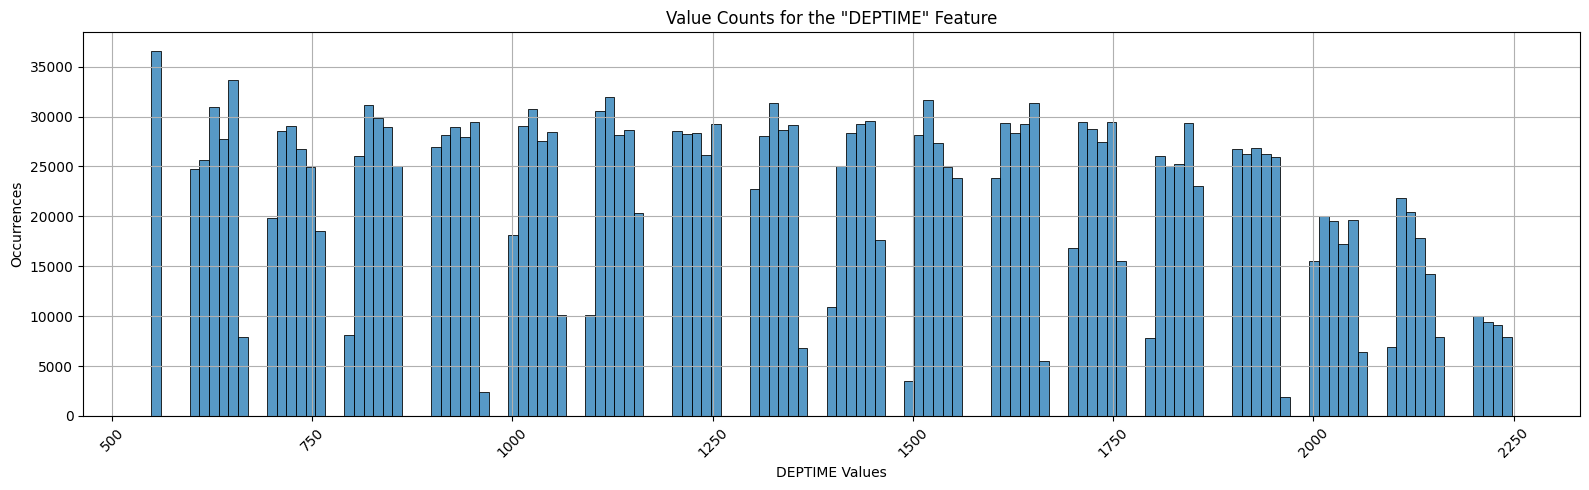


/───────────────────────────────────────────────  FEATURE: CRSDEPTIME  ───────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2345534 entries, 0 to 2389216
Series name: crsdeptime
Non-Null Count    Dtype
--------------    -----
2345534 non-null  int64
dtypes: int64(1)
memory usage: 35.8 MB


None

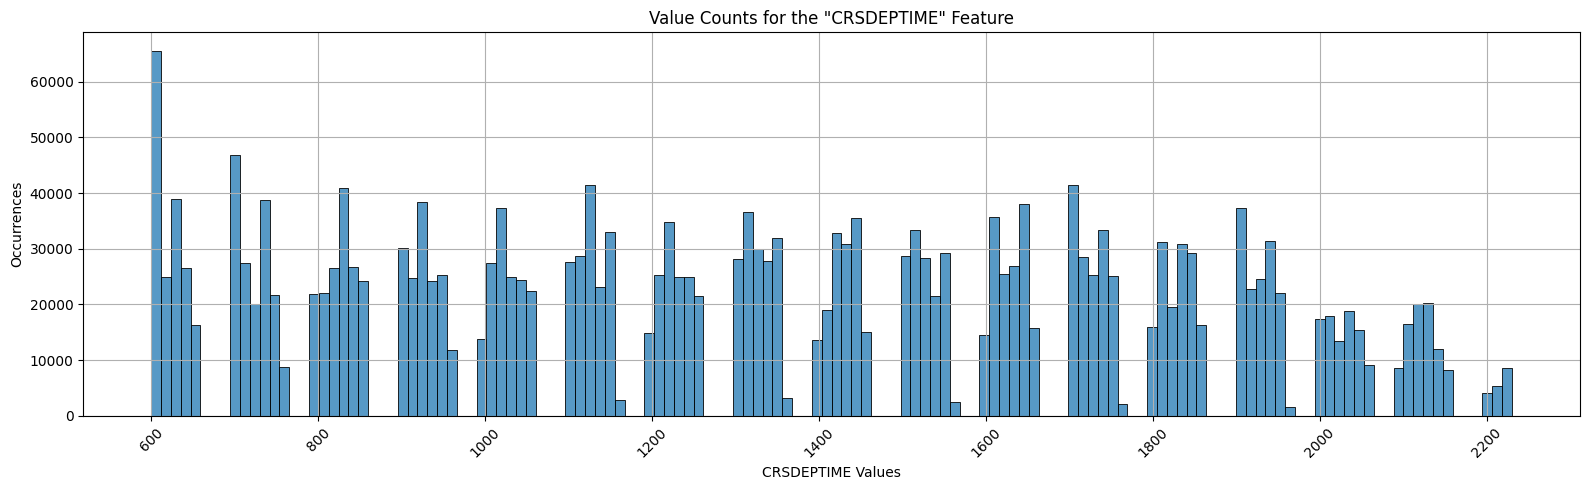


/─────────────────────────────────────────────────  FEATURE: ARRTIME  ─────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2273659 entries, 0 to 2389216
Series name: arrtime
Non-Null Count    Dtype  
--------------    -----  
2273659 non-null  float64
dtypes: float64(1)
memory usage: 34.7 MB


None

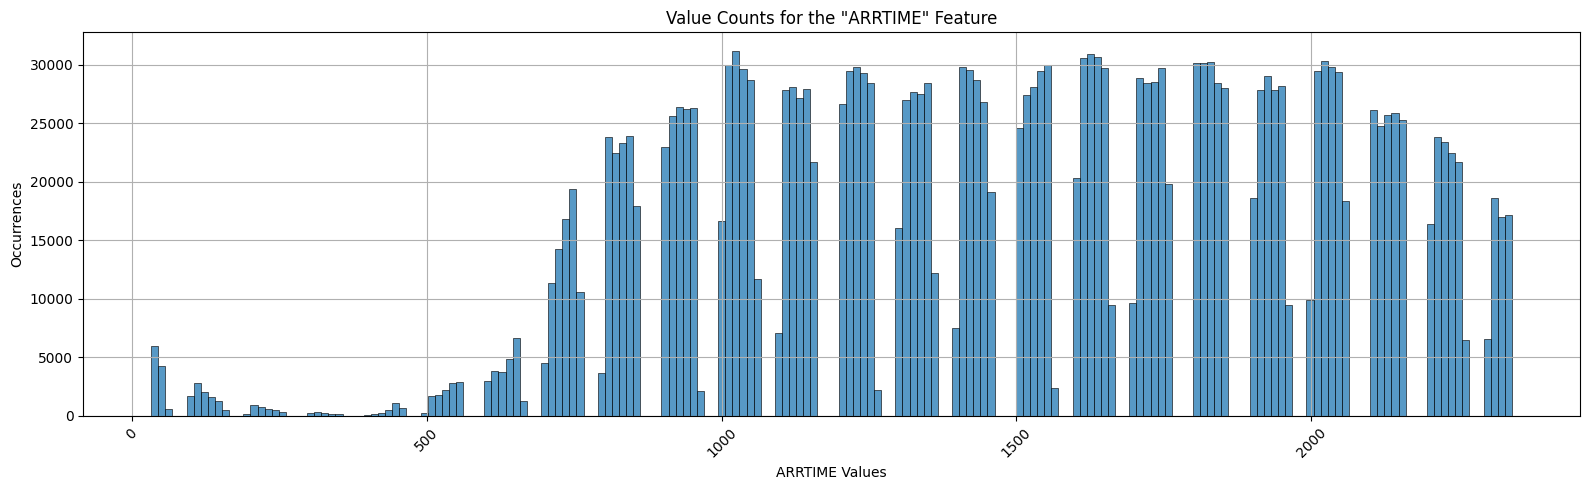


/───────────────────────────────────────────────  FEATURE: CRSARRTIME  ───────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2343034 entries, 0 to 2389216
Series name: crsarrtime
Non-Null Count    Dtype
--------------    -----
2343034 non-null  int64
dtypes: int64(1)
memory usage: 35.8 MB


None

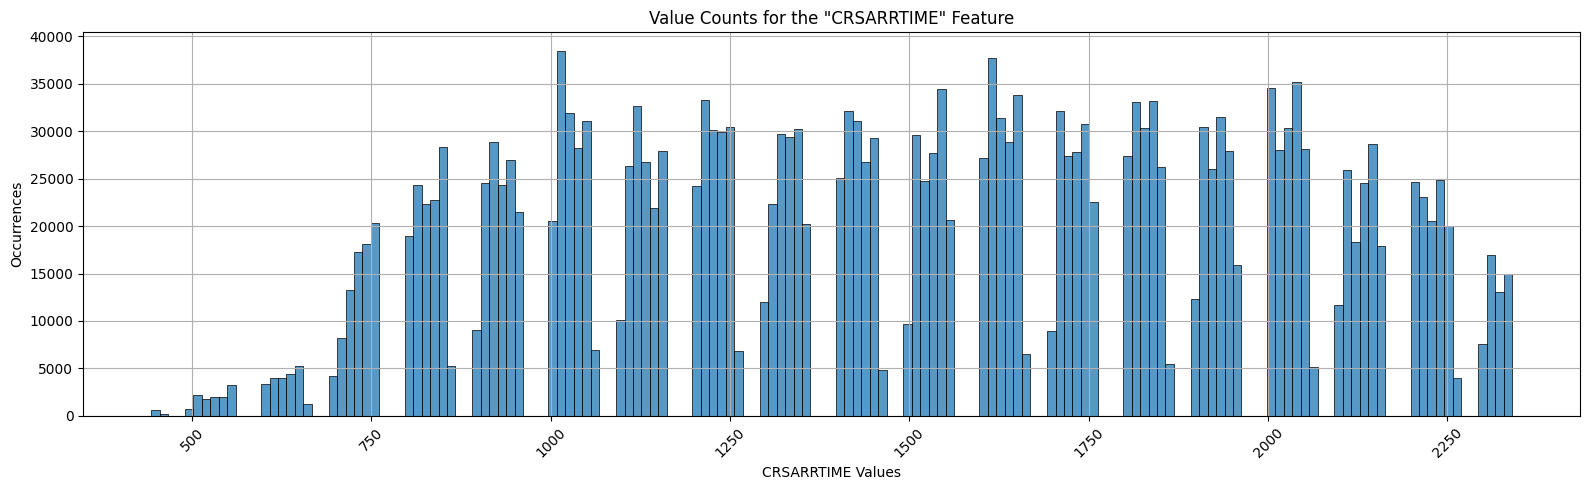


/────────────────────────────────────────────────  FEATURE: FLIGHTNUM  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2341769 entries, 0 to 2389216
Series name: flightnum
Non-Null Count    Dtype
--------------    -----
2341769 non-null  int64
dtypes: int64(1)
memory usage: 35.7 MB


None

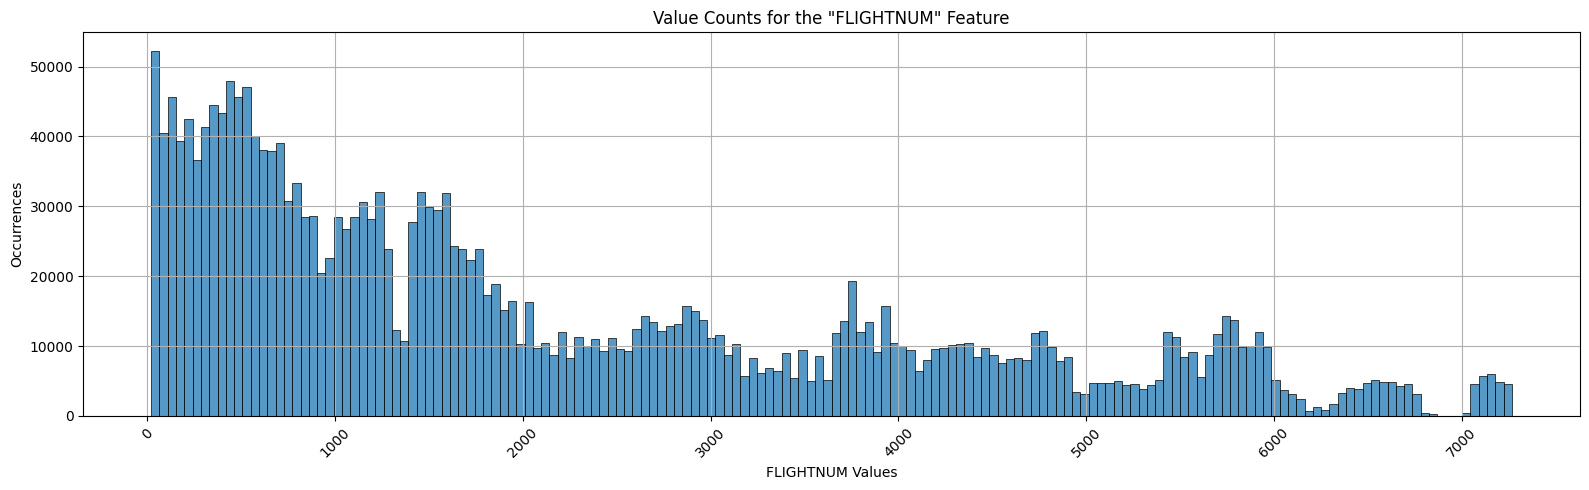


/────────────────────────────────────────────  FEATURE: ACTUALELAPSEDTIME  ────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2274067 entries, 0 to 2389216
Series name: actualelapsedtime
Non-Null Count    Dtype  
--------------    -----  
2274067 non-null  float64
dtypes: float64(1)
memory usage: 34.7 MB


None

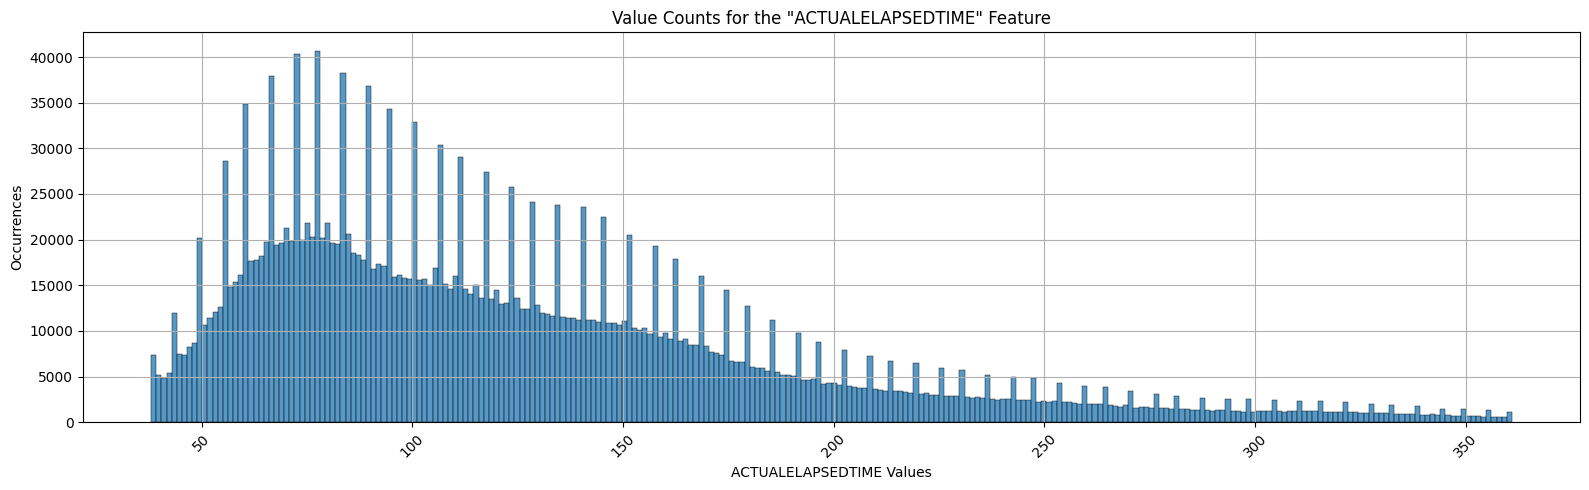


/─────────────────────────────────────────────  FEATURE: CRSELAPSEDTIME  ─────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2341329 entries, 0 to 2389216
Series name: crselapsedtime
Non-Null Count    Dtype  
--------------    -----  
2341329 non-null  float64
dtypes: float64(1)
memory usage: 35.7 MB


None

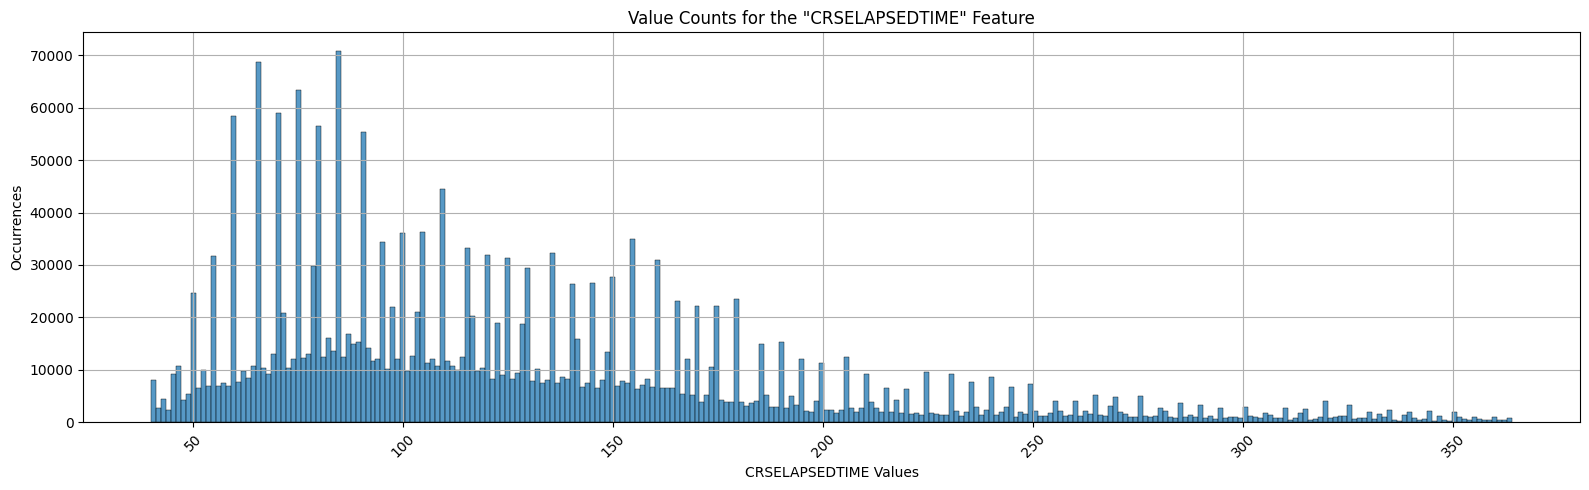


/─────────────────────────────────────────────────  FEATURE: AIRTIME  ─────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2274343 entries, 0 to 2389216
Series name: airtime
Non-Null Count    Dtype  
--------------    -----  
2274343 non-null  float64
dtypes: float64(1)
memory usage: 34.7 MB


None

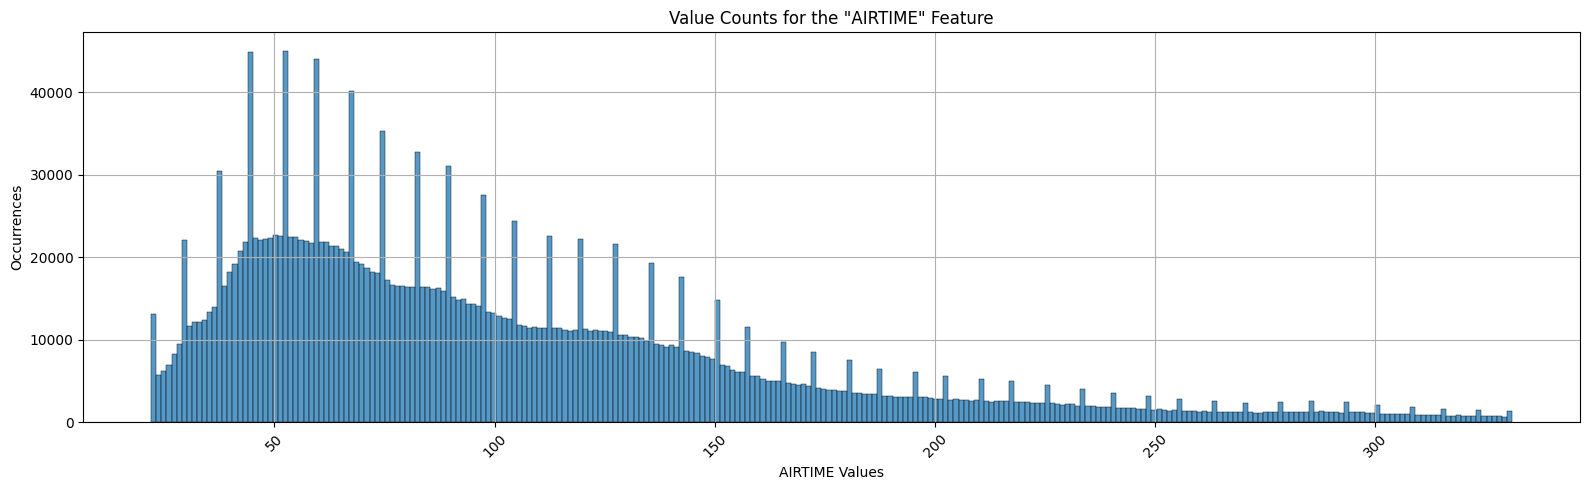


/────────────────────────────────────────────────  FEATURE: ARRDELAY  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2275314 entries, 0 to 2389216
Series name: arrdelay
Non-Null Count    Dtype  
--------------    -----  
2275314 non-null  float64
dtypes: float64(1)
memory usage: 34.7 MB


None

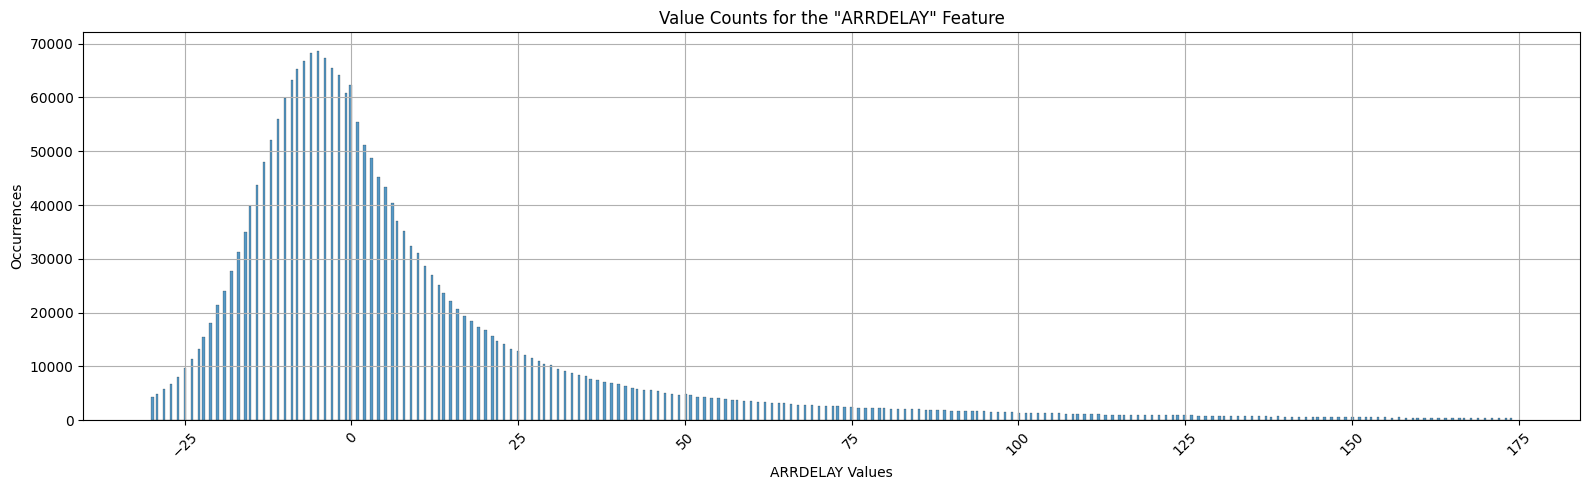


/────────────────────────────────────────────────  FEATURE: DEPDELAY  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2282775 entries, 0 to 2389216
Series name: depdelay
Non-Null Count    Dtype  
--------------    -----  
2282775 non-null  float64
dtypes: float64(1)
memory usage: 34.8 MB


None

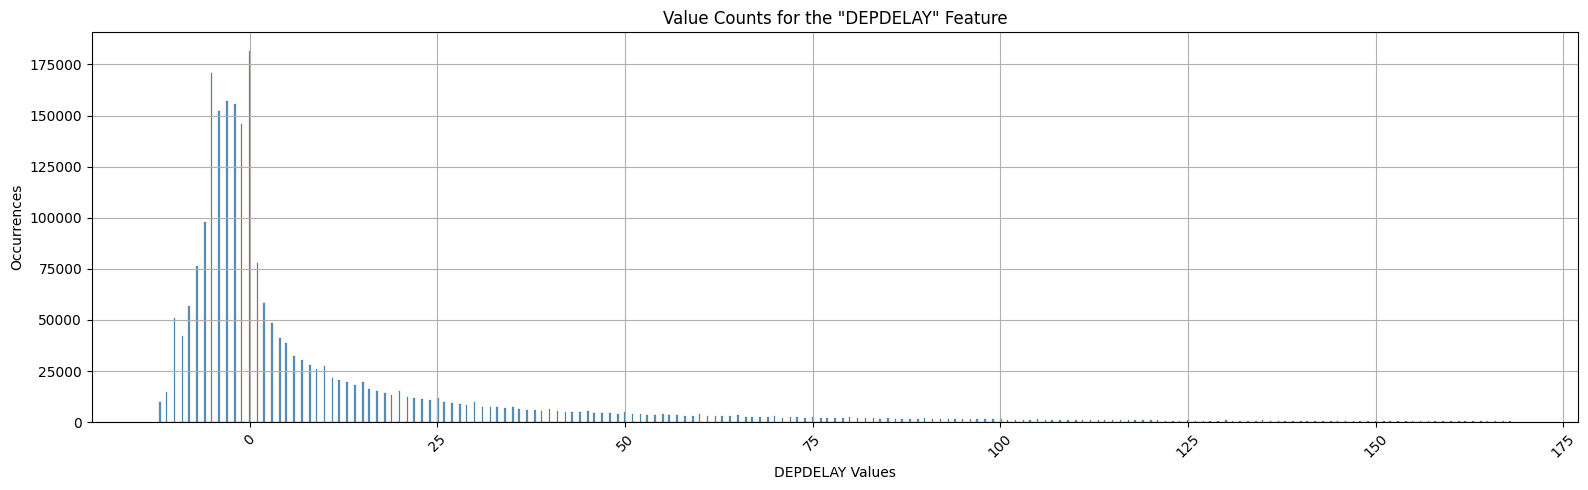


/────────────────────────────────────────────────  FEATURE: DISTANCE  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2344927 entries, 0 to 2389216
Series name: distance
Non-Null Count    Dtype
--------------    -----
2344927 non-null  int64
dtypes: int64(1)
memory usage: 35.8 MB


None

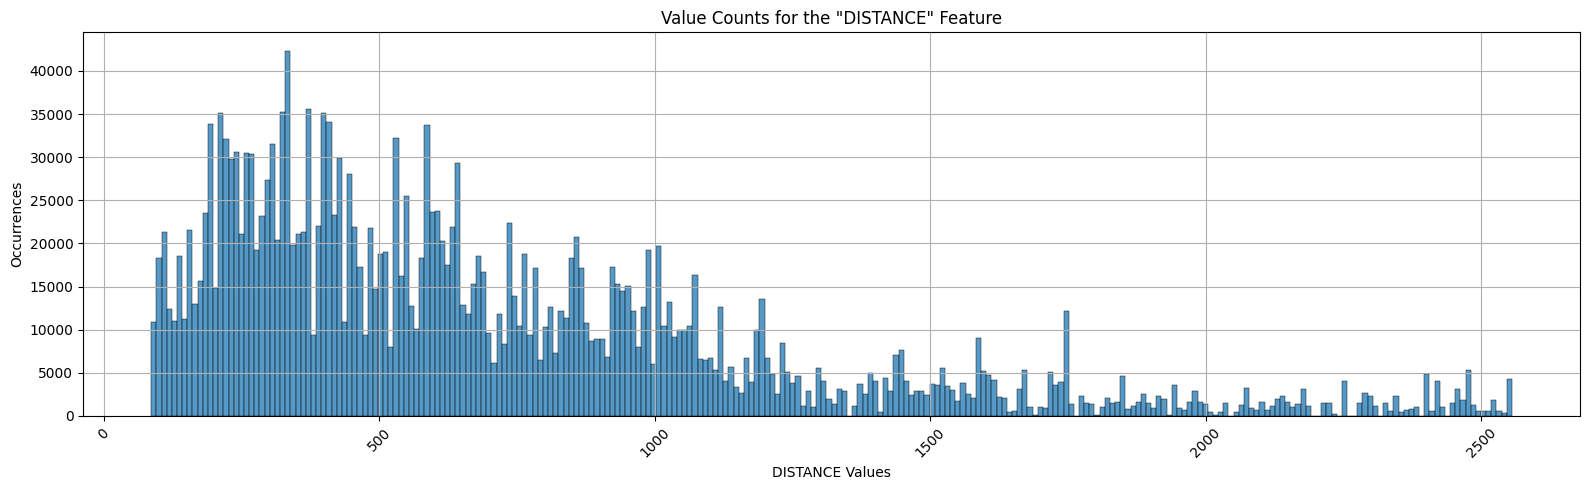


/─────────────────────────────────────────────────  FEATURE: TAXIIN  ─────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2288001 entries, 0 to 2389216
Series name: taxiin
Non-Null Count    Dtype  
--------------    -----  
2288001 non-null  float64
dtypes: float64(1)
memory usage: 34.9 MB


None

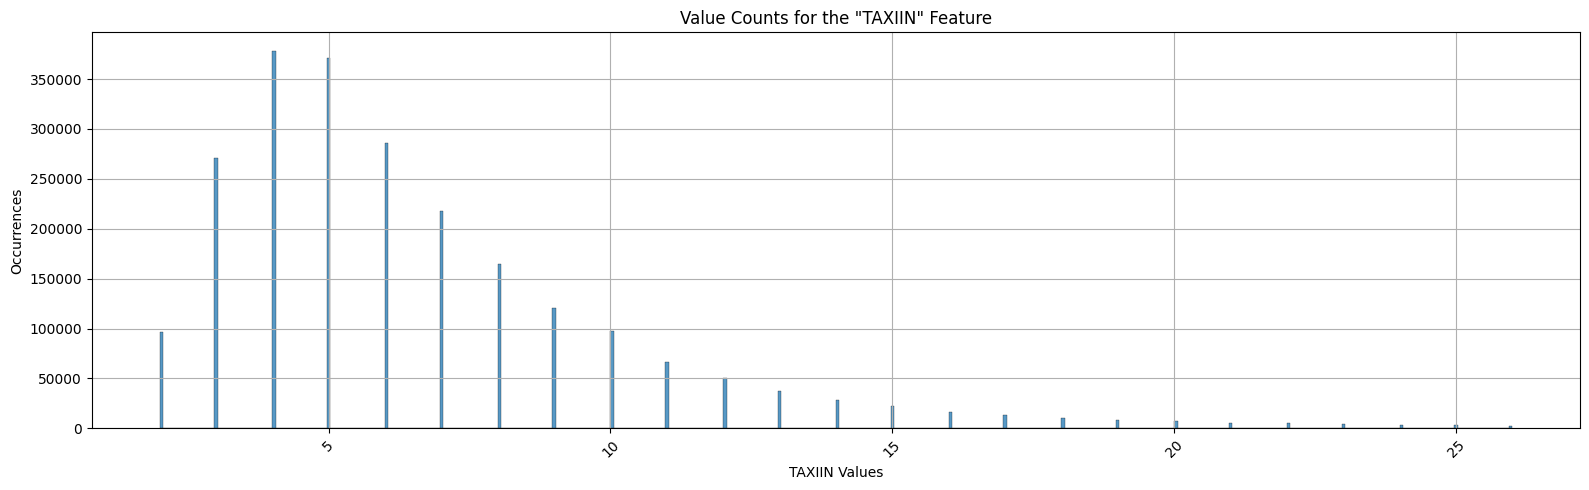


/─────────────────────────────────────────────────  FEATURE: TAXIOUT  ─────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2292050 entries, 0 to 2389216
Series name: taxiout
Non-Null Count    Dtype  
--------------    -----  
2292050 non-null  float64
dtypes: float64(1)
memory usage: 35.0 MB


None

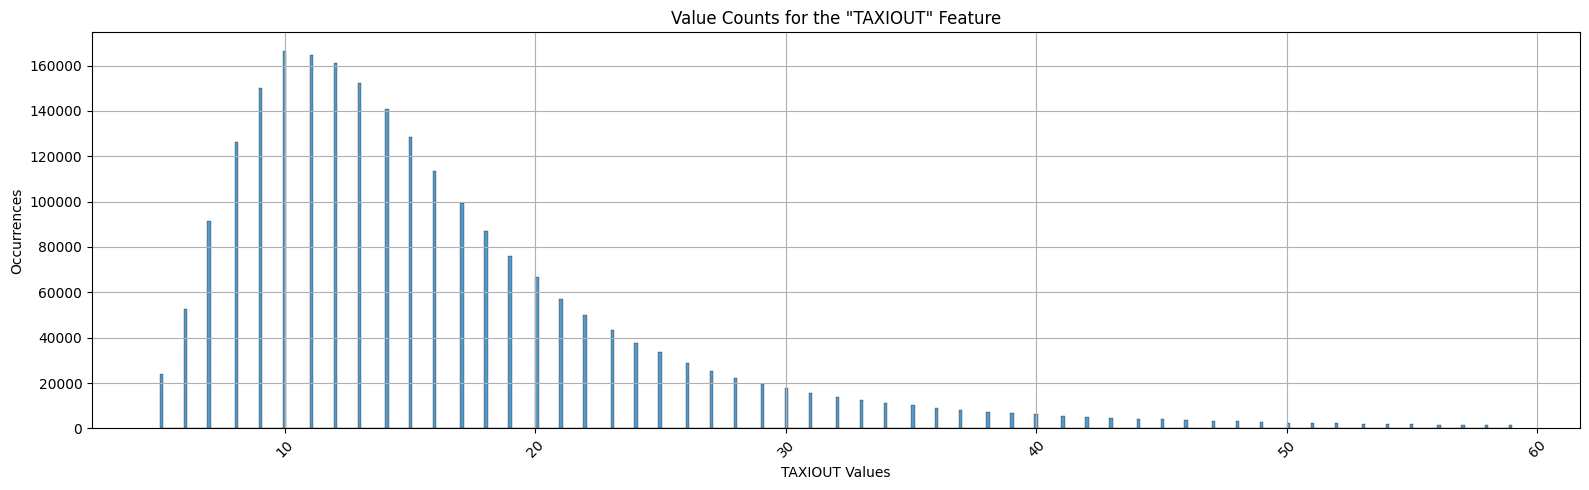


/────────────────────────────────────────────────  FEATURE: CANCELLED  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
RangeIndex: 2389217 entries, 0 to 2389216
Series name: cancelled
Non-Null Count    Dtype
--------------    -----
2389217 non-null  int64
dtypes: int64(1)
memory usage: 18.2 MB


None

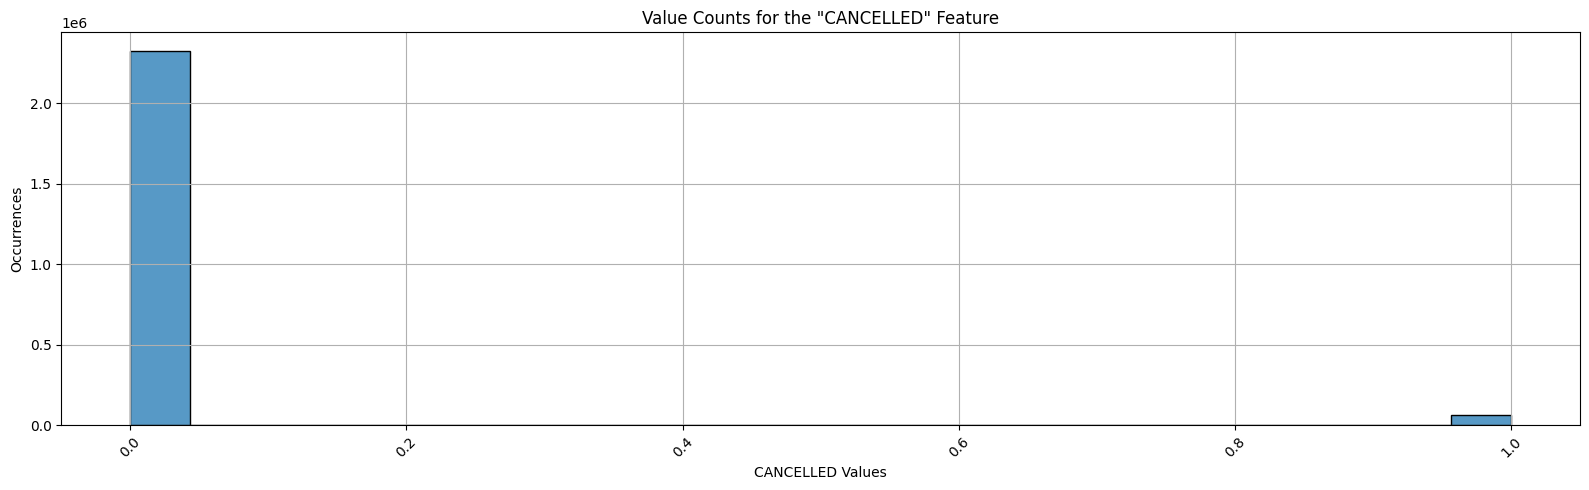


/────────────────────────────────────────────────  FEATURE: DIVERTED  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 2383563 entries, 0 to 2389216
Series name: diverted
Non-Null Count    Dtype
--------------    -----
2383563 non-null  int64
dtypes: int64(1)
memory usage: 36.4 MB


None

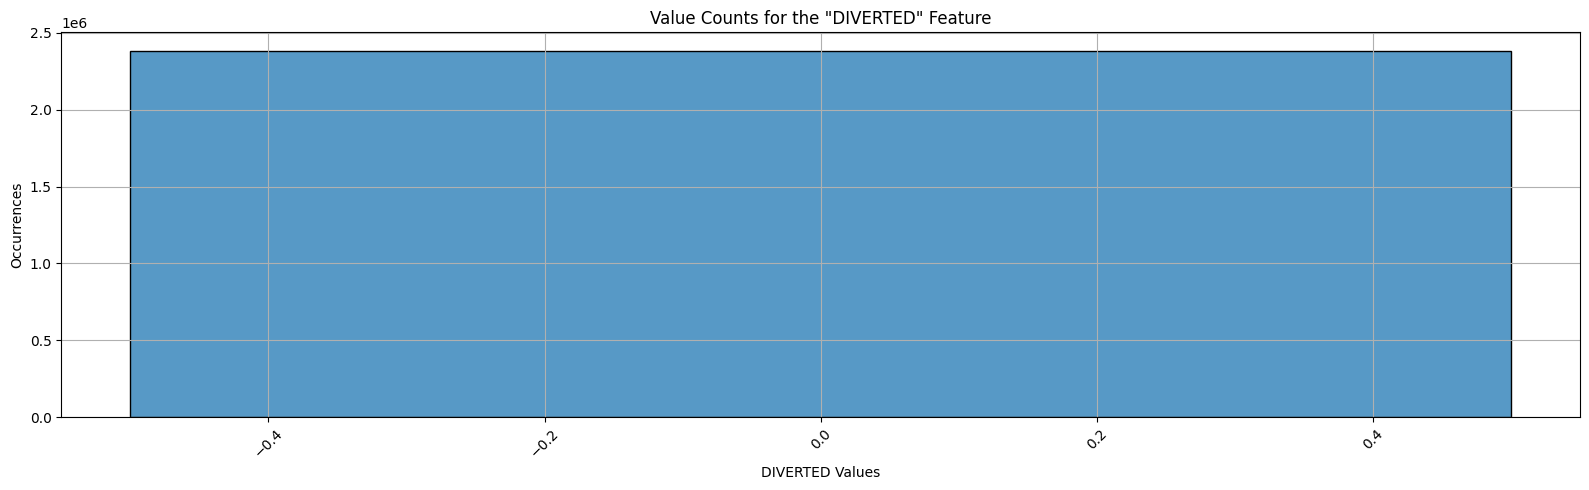


/──────────────────────────────────────────────  FEATURE: CARRIERDELAY  ──────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 578742 entries, 0 to 2389197
Series name: carrierdelay
Non-Null Count   Dtype  
--------------   -----  
578742 non-null  float64
dtypes: float64(1)
memory usage: 8.8 MB


None

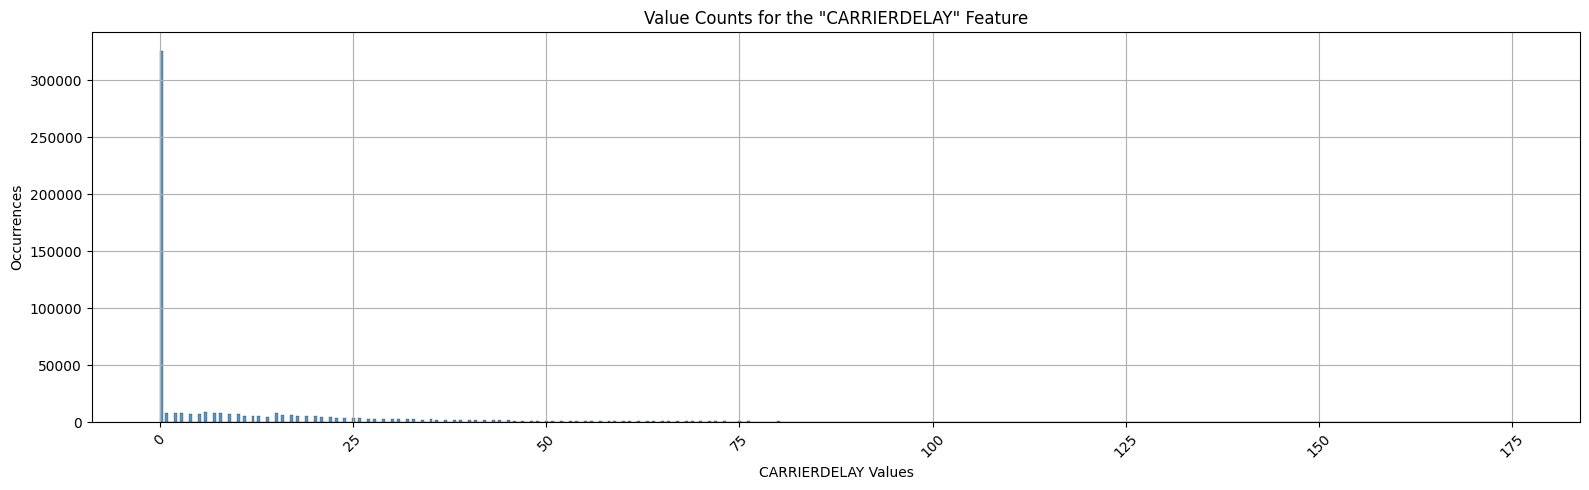


/──────────────────────────────────────────────  FEATURE: WEATHERDELAY  ──────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 578810 entries, 0 to 2389197
Series name: weatherdelay
Non-Null Count   Dtype  
--------------   -----  
578810 non-null  float64
dtypes: float64(1)
memory usage: 8.8 MB


None

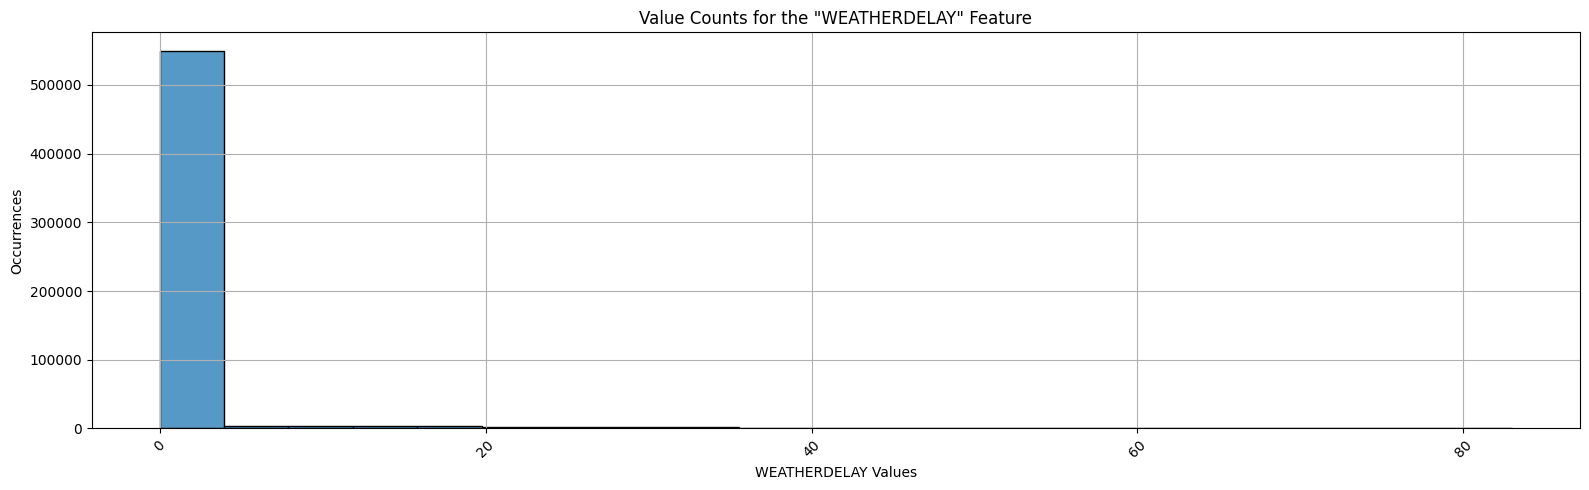


/────────────────────────────────────────────────  FEATURE: NASDELAY  ────────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 578788 entries, 0 to 2389197
Series name: nasdelay
Non-Null Count   Dtype  
--------------   -----  
578788 non-null  float64
dtypes: float64(1)
memory usage: 8.8 MB


None

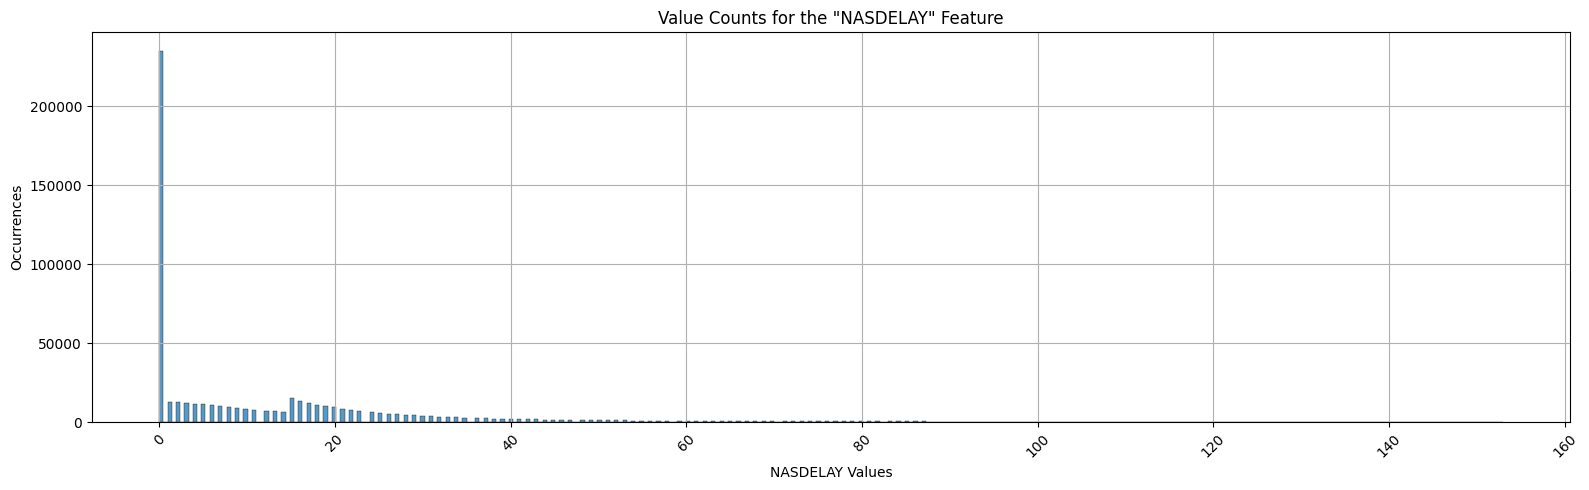


/──────────────────────────────────────────────  FEATURE: SECURITYDELAY  ──────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 581835 entries, 0 to 2389197
Series name: securitydelay
Non-Null Count   Dtype  
--------------   -----  
581835 non-null  float64
dtypes: float64(1)
memory usage: 8.9 MB


None

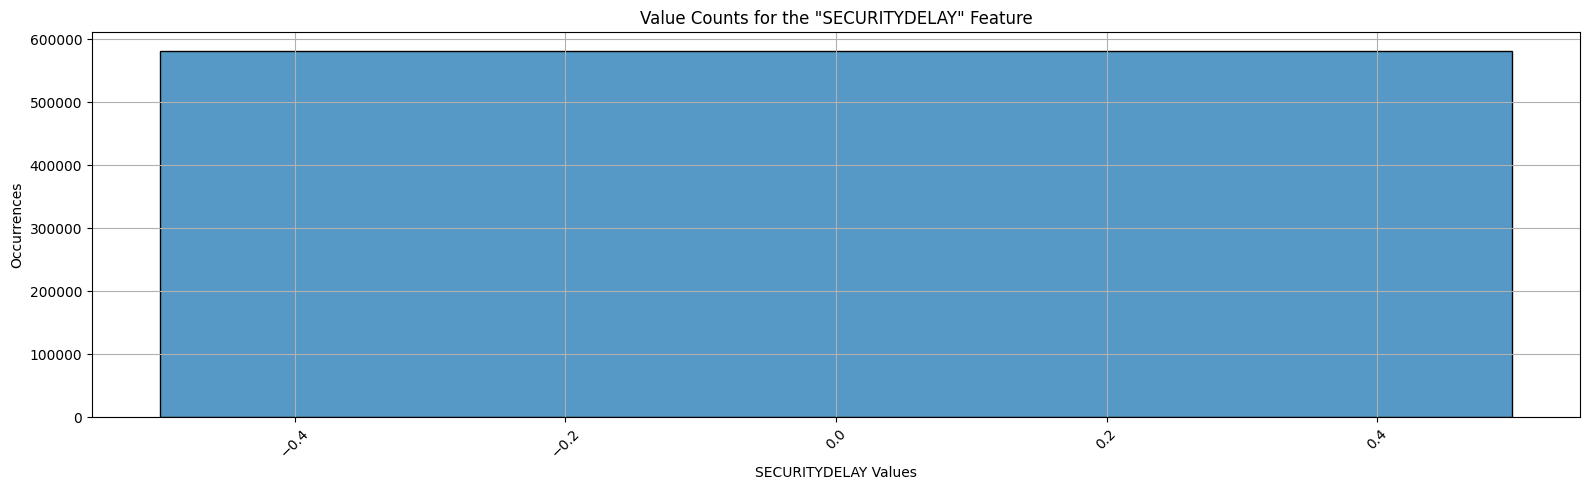


/────────────────────────────────────────────  FEATURE: LATEAIRCRAFTDELAY  ────────────────────────────────────────────/

<class 'pandas.core.series.Series'>
Index: 578783 entries, 0 to 2389197
Series name: lateaircraftdelay
Non-Null Count   Dtype  
--------------   -----  
578783 non-null  float64
dtypes: float64(1)
memory usage: 8.8 MB


None

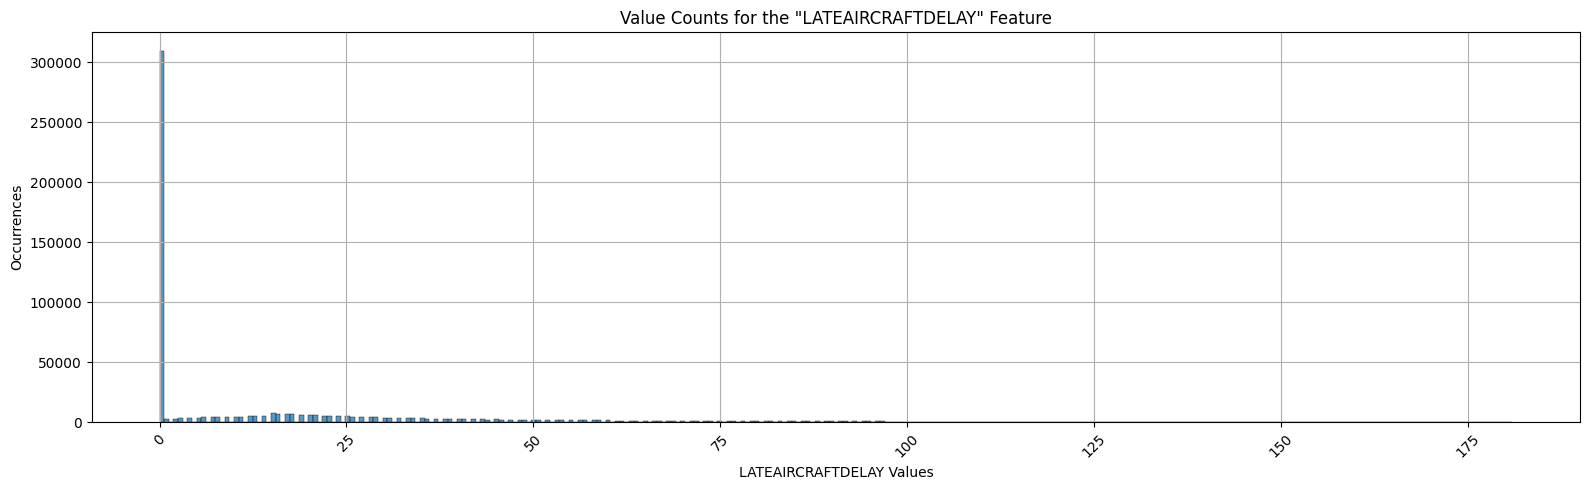

In [24]:
'''
Iterate over the numerical features:
    * Get it's unique values and counts for each
    * Plot the value counts to understand distribution
'''

# Evaluate KDE
for cmv in cols_num:
    print( helper_print_heading( f'Feature: {cmv}' ))

    # drop outliers to see true shape, since outliers will be dropped later
    lower_limit = df[cmv].quantile(0.01)
    upper_limit = df[cmv].quantile(0.99)

    # Filter the DataFrame to exclude values outside the 2th-98th percentile range
    filtered_df = df[(df[cmv] >= lower_limit) & (df[cmv] <= upper_limit)]
    display( filtered_df[cmv].info() )
    #sns.kdeplot(data=filtered_df[cmv])
    sns.histplot(data=filtered_df[cmv])
    plt.title(f'Value Counts for the "{cmv.upper()}" Feature' )
    plt.xlabel(f'{cmv.upper()} Values')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'images/capstone-univariate-numerical-kde-plot-{cmv.lower()}.png')
    plt.show()

In [25]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype   
---  ------             -----   
 0   year               int16   
 1   month              int8    
 2   dayofmonth         int8    
 3   dayofweek          int8    
 4   deptime            float32 
 5   crsdeptime         int16   
 6   arrtime            float32 
 7   crsarrtime         int16   
 8   uniquecarrier      category
 9   flightnum          int16   
 10  tailnum            category
 11  actualelapsedtime  float16 
 12  crselapsedtime     float16 
 13  airtime            float16 
 14  arrdelay           float32 
 15  depdelay           float32 
 16  origin             category
 17  dest               category
 18  distance           int16   
 19  taxiin             float16 
 20  taxiout            float16 
 21  cancelled          int8    
 22  cancellationcode   category
 23  diverted           int8    
 24  carrierdelay       float

---

***💡 Insights: Univariate Analysis***
* Less than three percent (>3%) of flights were cancelled (`cancelled`)
* Less than half a percent (>0.5%) of flights were diverted (`diverted`)

---

#### 2.4.4 Multivariate Analysis
* Correlation Matrix (Heatmap)
* Histograms

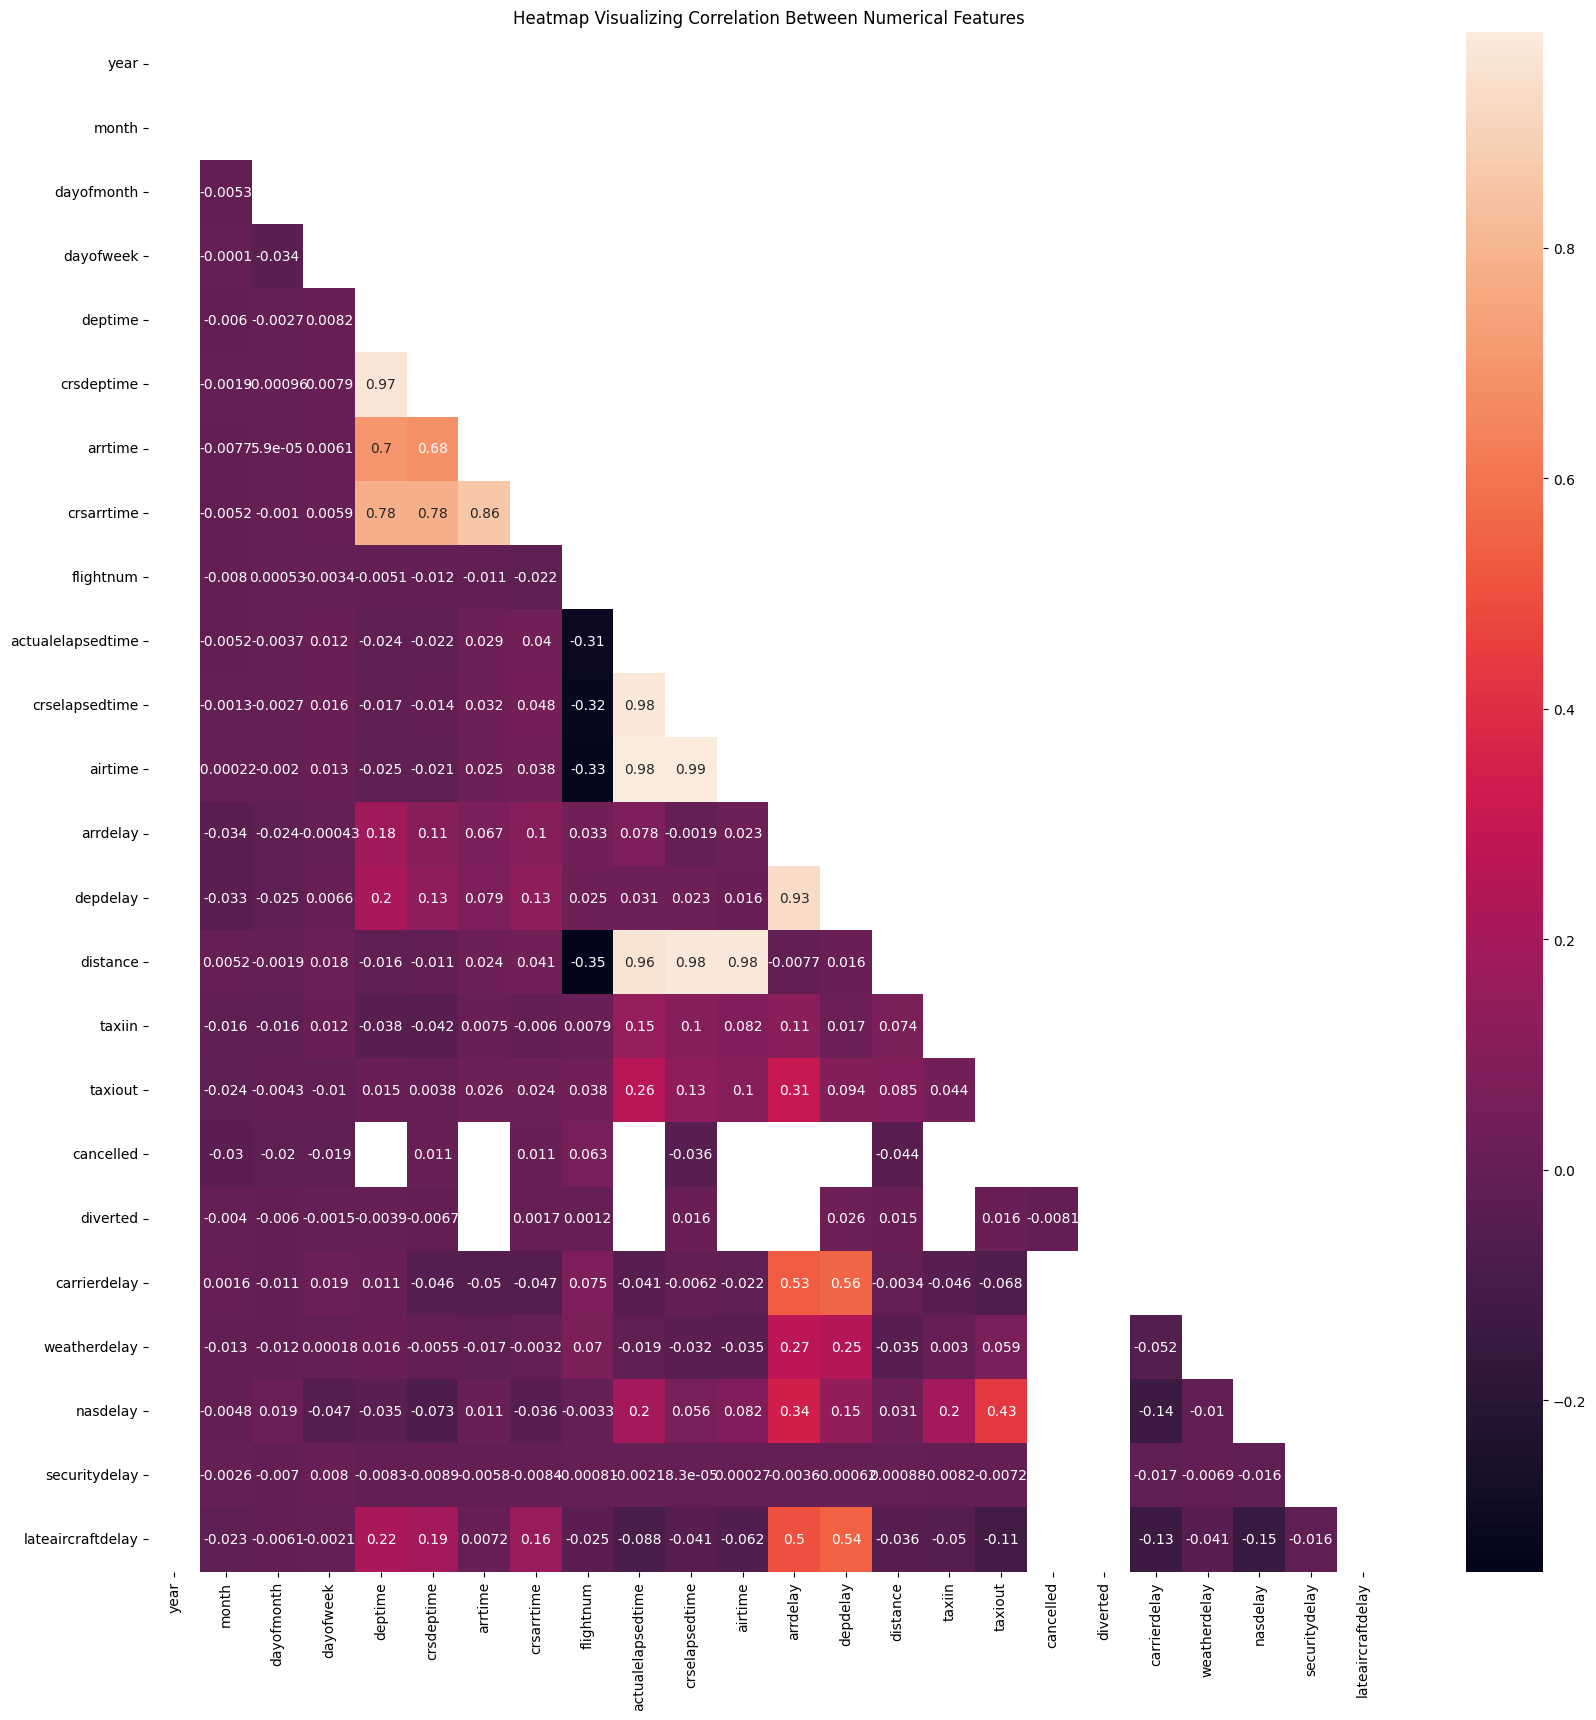

In [26]:
# Seaborn heatmap of dataframe correlation
## uses custom function `triangle_correlation_heatmap`, passing in the dataframe
## and indicates to spotlight the high multicollinear relationships for review

triangle_correlation_heatmap( df_opt )

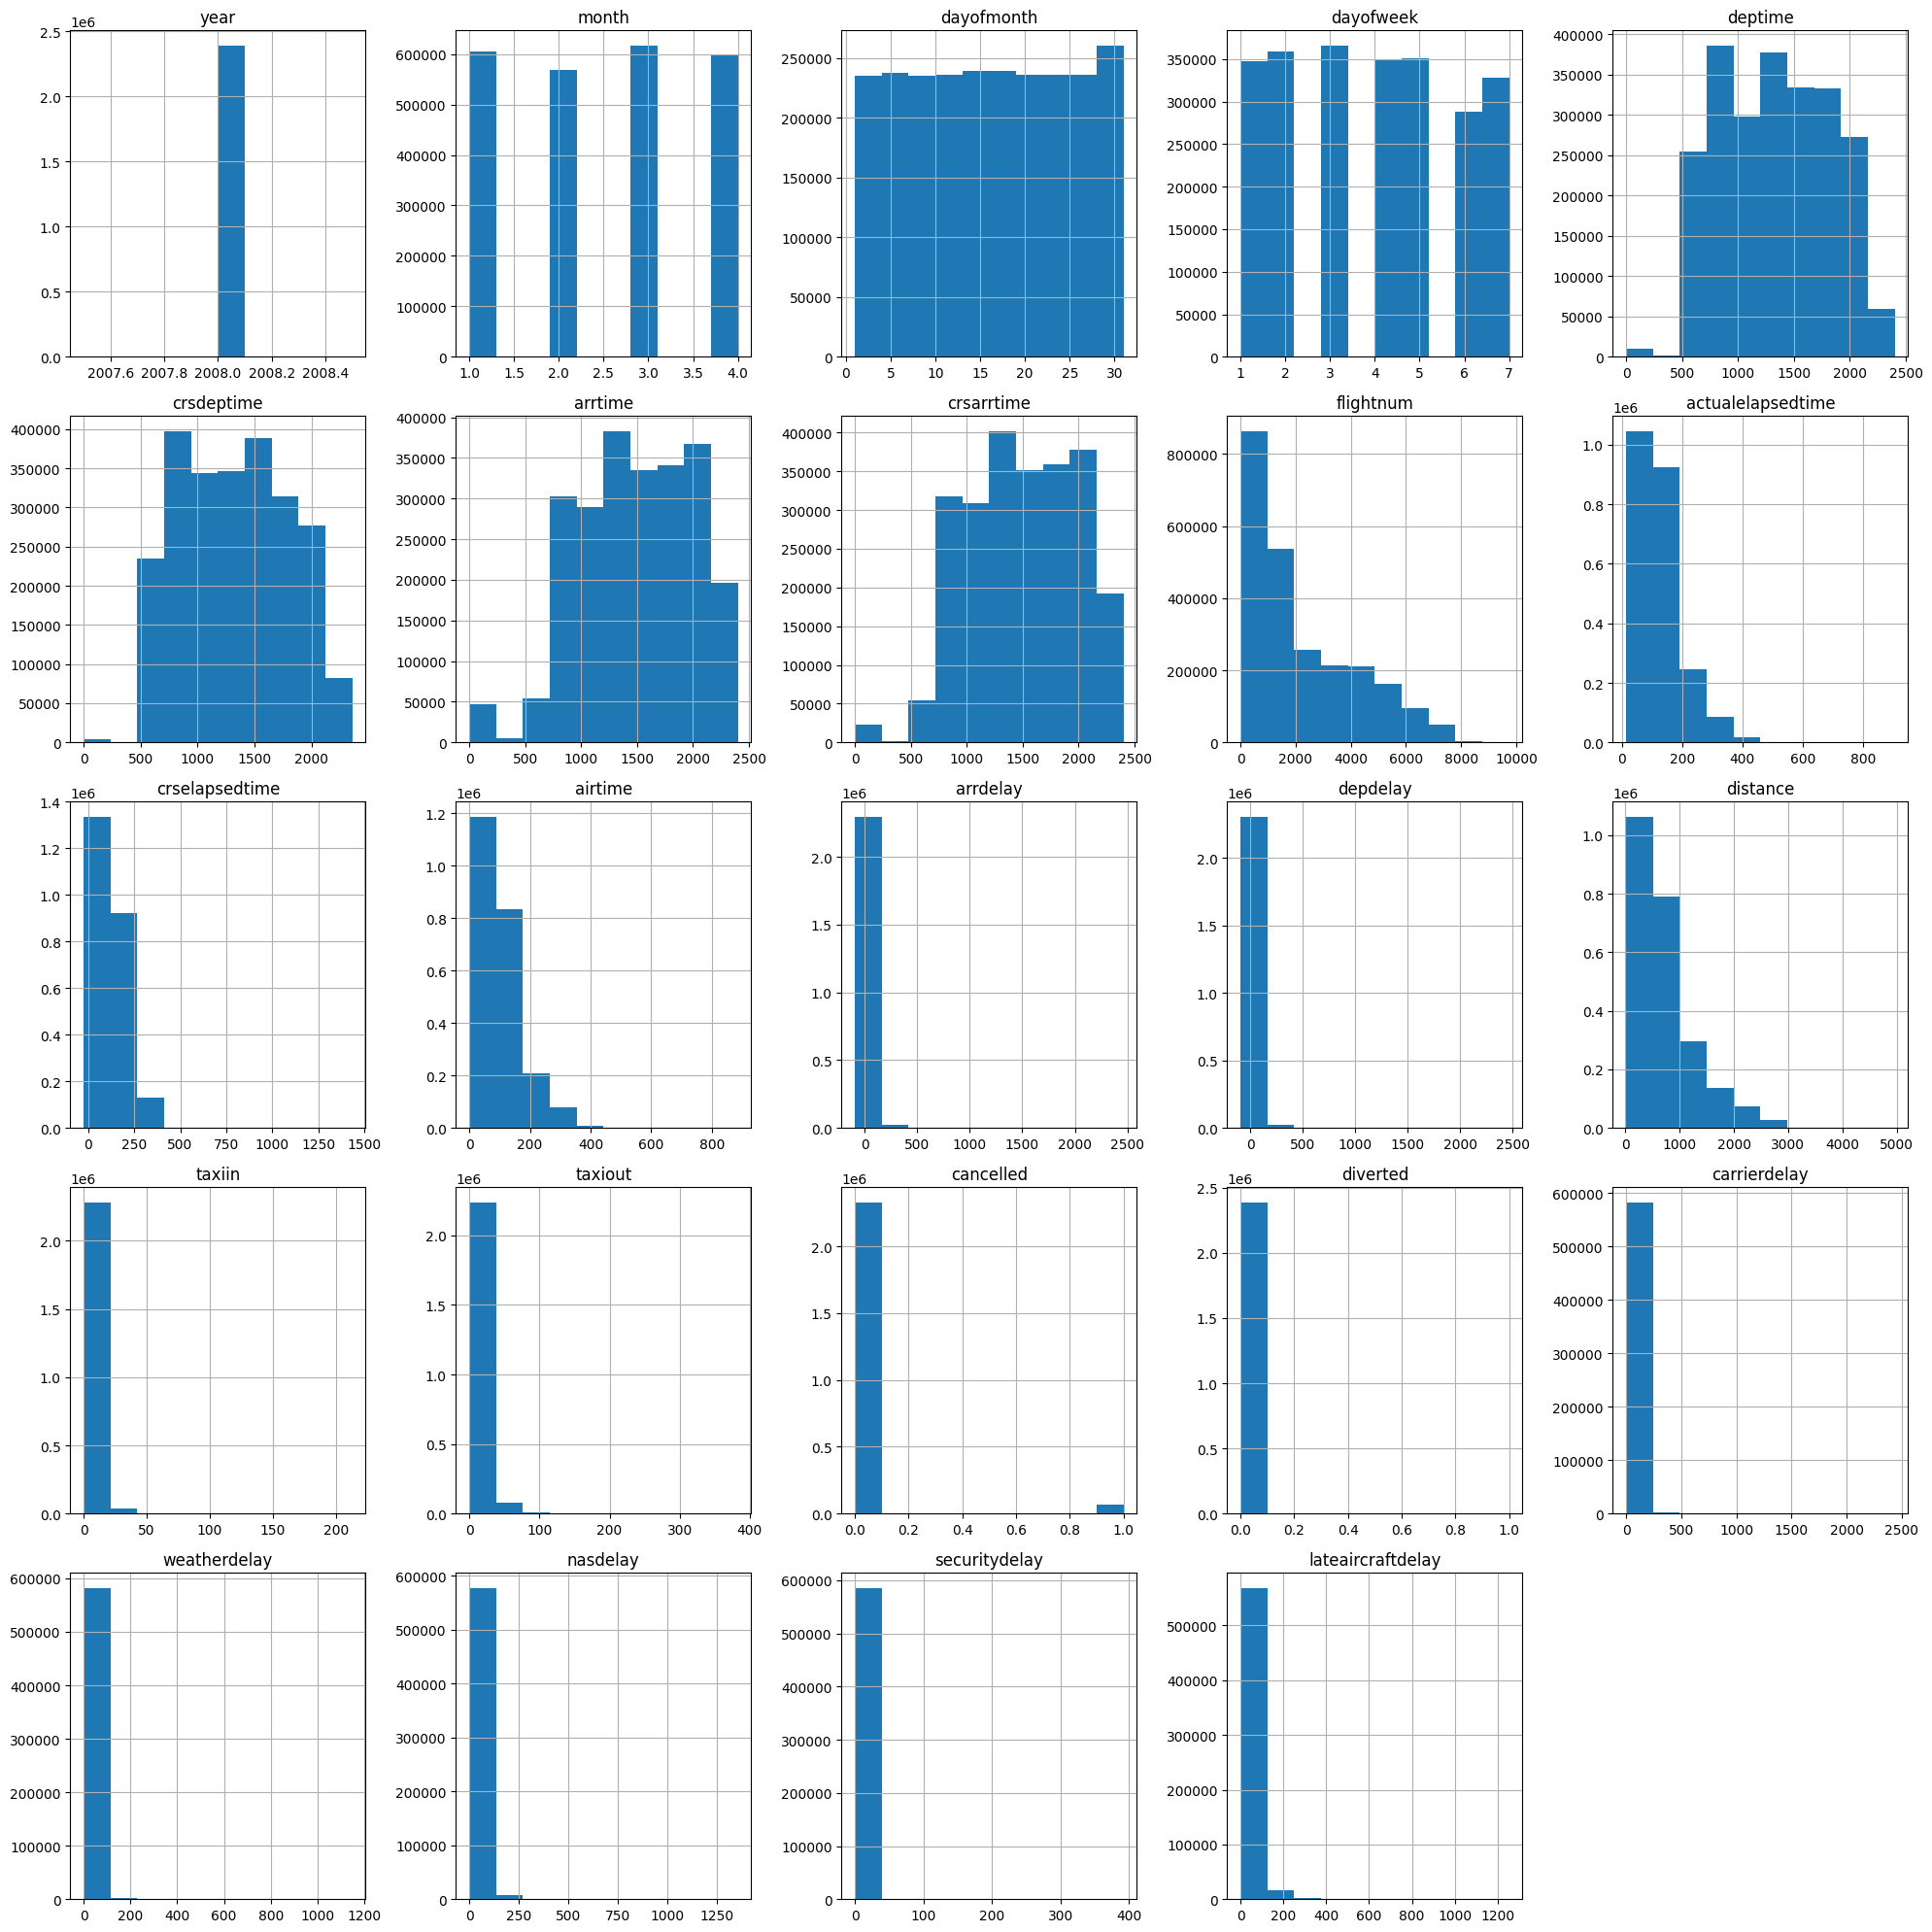

In [27]:
# Review histograms for numerical features

df_opt.hist(figsize=(20,20));
plt.tight_layout()


### 2.5 Engineered Target Feature Analysis
* Distribution of engineered target feature `flight_outcome`
* Relationship between `flight_outcome` and:
    * `uniquecarrier`: specific airline carriers, suggesting certain carriers may be more prone to flight issues
    * `tailnum`: specific actual planes, suggesting certain planes may be more prone to mechanical issues causing flight issues
    * `flightnum`: certain flight paths, suggesting certain flights are more likely to incur flight changes
    * `origin`: related to `flightnum`, suggests departing from certain airports are more likely to incur flight changes
    * `dest`: related to `flightnum`, suggests arriving to certain airports are more likely to incur flight changes

In [28]:
# Setup a copy of dataframe to review correlations to proposed target feature engineered later:
df_test_target = df_opt.copy()

# Create target feature from existing features
df_test_target["flight_outcome"] = 0     # 0 = 'on-schedule'
df_test_target["flight_outcome"] = df_test_target.apply(lambda x: create_target_feature( x["cancelled"], x["diverted"]), axis=1)


#### 2.5.1 Relationship with `uniquecarrier`

In [29]:
# How many flights per carrier were cancelled or diverted? 
# use Custom Python Function `profileFeatureAndTarget` (section 2.3.5)

target_uc = profileFeatureAndTarget( df_test_target, 'uniquecarrier' )

,uniquecarrier,On-Schedule,Cancelled/Diverted,percentChanged
19,YV,80363,5323,6.2122
11,MQ,158426,9434,5.6202
1,AA,193114,11405,5.5765
0,9E,83975,4384,4.9616
13,OH,69176,2758,3.8341
14,OO,187917,7267,3.7232
15,UA,149156,4880,3.1681
18,XE,134444,4313,3.1083
7,EV,89819,2564,2.7754
6,DL,147987,3422,2.2601


#### 2.5.2 Relationship with `tailnum`

In [30]:
# How many flights per tail number / individual airplane were cancelled or diverted? 
# use Custom Python Function `profileFeatureAndTarget` (section 2.3.5)

target_tn = profileFeatureAndTarget( df_test_target, 'tailnum' )

,tailnum,On-Schedule,Cancelled/Diverted,percentChanged
5030,Unknow,0,6,100.0000
148,9179E,0,25,100.0000
141,9159E,0,18,100.0000
145,9169E,0,33,100.0000
147,91769E,0,1,100.0000
139,9149E,0,42,100.0000
3497,N702DN,1,1,50.0000
739,N194DN,3,2,40.0000
527,N1613B,3,2,40.0000
484,N152DL,2,1,33.3333


In [31]:
df_test_target.query( 'tailnum == "9179E"' ).head()

# Many planes for carrier `9E` show historical flight cancellation/diversion

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,flight_outcome
2239533,2008,4,10,4,NaN,1102,NaN,1224,9E,2001,9179E,NaN,NaN,NaN,NaN,NaN,ATL,IAH,689,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1
2239556,2008,4,10,4,NaN,715,NaN,1020,9E,2001,9179E,NaN,NaN,NaN,NaN,NaN,MKE,ATL,669,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1
2239577,2008,4,10,4,NaN,1630,NaN,1815,9E,2002,9179E,NaN,NaN,NaN,NaN,NaN,ATL,PIT,526,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1
2239600,2008,4,10,4,NaN,1255,NaN,1555,9E,2002,9179E,NaN,NaN,NaN,NaN,NaN,IAH,ATL,689,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1
2239657,2008,4,12,6,NaN,600,NaN,703,9E,2004,9179E,NaN,NaN,NaN,NaN,NaN,TYS,ATL,152,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,1


#### 2.5.3 Relationship with `flightnum`

In [32]:
# How many flights per flight number were cancelled or diverted? 
# use Custom Python Function `profileFeatureAndTarget` (section 2.3.5)

target_fn = profileFeatureAndTarget( df_test_target, 'flightnum' )

,flightnum,On-Schedule,Cancelled/Diverted,percentChanged
6192,6780,1,3,75.0000
5893,6322,2,4,66.6667
5960,6426,8,10,55.5556
6615,9740,1,1,50.0000
5848,6176,1,1,50.0000
6094,6626,1,1,50.0000
5865,6216,1,1,50.0000
5849,6177,2,2,50.0000
6586,7476,2,2,50.0000
6190,6778,1,1,50.0000


#### 2.5.4 Relationship with `origin`

In [33]:
# How many flights were cancelled or diverted based on origin airport? 
# use Custom Python Function `profileFeatureAndTarget` (section 2.3.5)

target_orig = profileFeatureAndTarget( df_test_target, 'origin' )

,origin,On-Schedule,Cancelled/Diverted,percentChanged
215,PLN,26,12,31.5789
13,ALO,78,26,25.0000
271,TEX,131,35,21.0843
64,CMX,97,24,19.8347
229,RHI,27,5,15.6250
22,AZO,1276,192,13.0790
267,SUN,890,133,13.0010
16,ASE,2210,322,12.7172
76,DBQ,409,58,12.4197
72,CWA,457,63,12.1154


#### 2.5.5 Relationship with `dest`

In [34]:
# How many flights were cancelled or diverted based on destination airport? 
# use Custom Python Function `profileFeatureAndTarget` (section 2.3.5)

target_orig = profileFeatureAndTarget( df_test_target, 'dest' )

,dest,On-Schedule,Cancelled/Diverted,percentChanged
198,OGD,0,2,100.0000
73,CYS,0,2,100.0000
217,PLN,26,12,31.5789
13,ALO,80,24,23.0769
273,TEX,131,35,21.0843
64,CMX,99,22,18.1818
231,RHI,27,5,15.6250
22,AZO,1287,180,12.2699
77,DBQ,412,53,11.3978
269,SUN,895,110,10.9453


<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">3.0 Data Preparation</h2>

* Create target feature
* Drop duplicate records
* Drop remaining missing values (2.93% decrease in data size, acceptable)
* Create dataframe with only useful features (good predictive power), either due to high multicollinearity or redundancy in definition.
* Scale all numerical features (`int*` and `float*` data types)
* Binarize relevant categorical features (`['']`)

### 3.1 Create Target feature
* Creation of new **target** feature `flight_outcome`, with the following class labels: `['on-schedule', 'cancelled', 'diverted']`

In [35]:
'''
Engineer New Target Feature `flight_outcome`, from `cancelled` and `diverted` features
- Use the `create_target_feature` custom python function, defined in section 2.3.5
- Updates data type to 'category'
'''
    
df_opt["flight_outcome"] = 0     # 0 = 'on-schedule'
df_opt["flight_outcome"] = df_opt.apply(lambda x: create_target_feature( x["cancelled"], x["diverted"]), axis=1)
#df_opt["flight_outcome"] = df_opt["flight_outcome"].astype( 'category' )

In [36]:
df_opt["flight_outcome"].value_counts( normalize=True )

flight_outcome
0   0.9707
1   0.0293
Name: proportion, dtype: float64

### 3.2 Feature Selection
* Subset Dataframe to only use features deemed important
* Drop the following features as they would not be available at the time of prediction:
    * `lateaircraftdelay`
    * `securitydelay`
    * `nasdelay`
    * `weatherdelay`
    * `carrierdelay`
    * `cancellationcode`
    * `depdelay`
    * `arrdelay`
    * `deptime`
    * `actualelapsedtime`
    * `arrtime`
    * `airtime`
    * `taxiin`
    * `taxiout`
* Drop the following as they're already represented within the target feature `flight_outcome`:
    * `diverted`
    * `cancelled`
* Drop the following as it contains a high number of unique category values
    * `tailnum` (There is potential to re-introduce this in a future evaluation re: specific planes being more prone to mechanical issues, and flight changes)

In [37]:
drop_cols = [ 'lateaircraftdelay', 
                'securitydelay',
                'nasdelay',
                'weatherdelay',
                'carrierdelay',
                'cancellationcode',
                'depdelay',
                'arrdelay',
                'cancelled',
                'diverted',
                'tailnum',
                'airtime',
                'arrtime',
                'deptime',
                'taxiin',
                'taxiout',
                'actualelapsedtime',
                'tailnum',
              ]

In [38]:
df_opt = df_opt.drop( drop_cols, axis=1 )
df_opt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 13 columns):
 #   Column          Dtype   
---  ------          -----   
 0   year            int16   
 1   month           int8    
 2   dayofmonth      int8    
 3   dayofweek       int8    
 4   crsdeptime      int16   
 5   crsarrtime      int16   
 6   uniquecarrier   category
 7   flightnum       int16   
 8   crselapsedtime  float16 
 9   origin          category
 10  dest            category
 11  distance        int16   
 12  flight_outcome  int64   
dtypes: category(3), float16(1), int16(5), int64(1), int8(3)
memory usage: 63.8 MB


### 3.3 Resolve Missing and Duplicate Data Concerns
* Backfill `N` for missing values for `cancellationcode`
* Backfill `0.0` for missing values for `lateaircraftdelay`, `securitydelay`, `nasdelay`, `weatherdelay`, `carrierdelay`
* Revisit missing values heatmap

In [39]:
'''
Backfill Missing Values for Specific Features
'''
# Now we can backfill all desired features with their backfill value
df_opt.fillna({
    'crselapsedtime': 0,
}, inplace = True)


In [40]:
df_opt.isna().sum()

year              0
month             0
dayofmonth        0
dayofweek         0
crsdeptime        0
crsarrtime        0
uniquecarrier     0
flightnum         0
crselapsedtime    0
origin            0
dest              0
distance          0
flight_outcome    0
dtype: int64

In [41]:
'''
Drop Duplicates (expecting 4 duplicate records to drop)
Drop Remaining Records with Missing Values
'''

df_prep = df_opt.dropna().drop_duplicates()

# validate 4 records were dropped
df_opt.shape[0] - df_prep.shape[0]

4

In [42]:
# Remove records for categorical values where train/test sets may have uneven distribution:
origin_counts = df_prep['origin'].value_counts()
origin_values_drop = origin_counts[origin_counts < 20].index
df_prep = df_prep[~df_prep['origin'].isin( origin_values_drop )]

dest_counts = df_prep['dest'].value_counts()
dest_values_drop = dest_counts[dest_counts < 20].index
df_prep = df_prep[~df_prep['dest'].isin( dest_values_drop )]


/──────────────────────────────────  MISSING DATA AND DUPLICATED RECORDS IN DATASET  ──────────────────────────────────/
 
Percentage of original data lost if all missing data is dropped: 0.00% 
Number of duplicated records in dataset: 0

/─────────────────────────────────────────  TOTAL MISSING VALUES BY FEATURE  ─────────────────────────────────────────/



,Missing Values,Percentage
year,0,0.0000
month,0,0.0000
dayofmonth,0,0.0000
dayofweek,0,0.0000
crsdeptime,0,0.0000
crsarrtime,0,0.0000
uniquecarrier,0,0.0000
flightnum,0,0.0000
crselapsedtime,0,0.0000
origin,0,0.0000


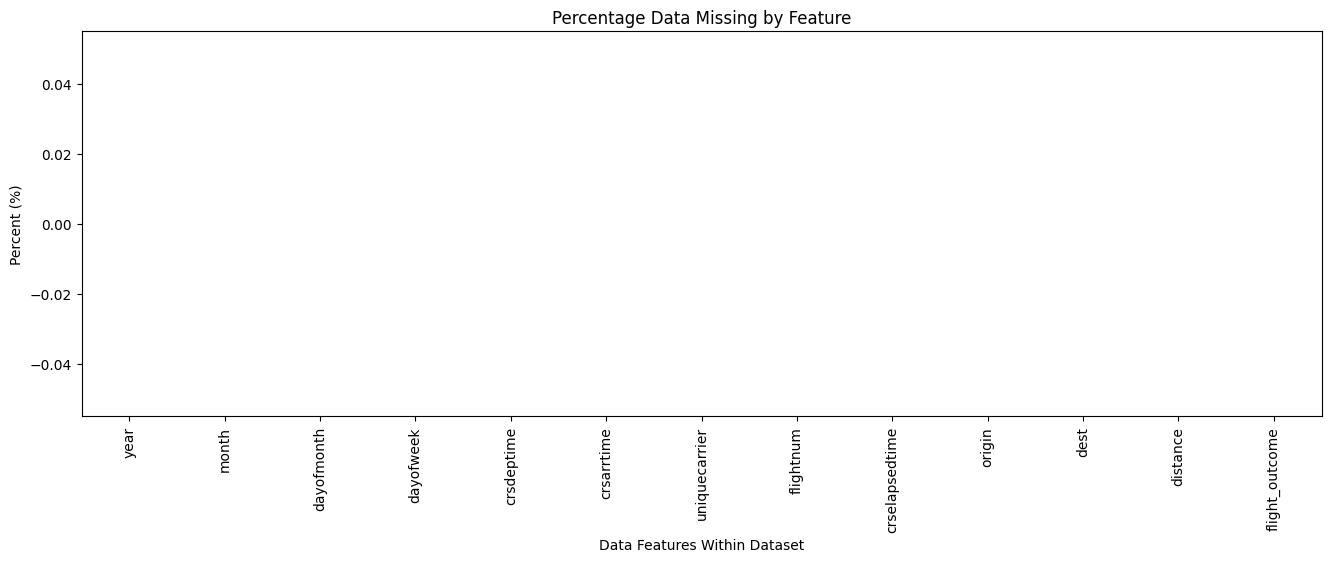

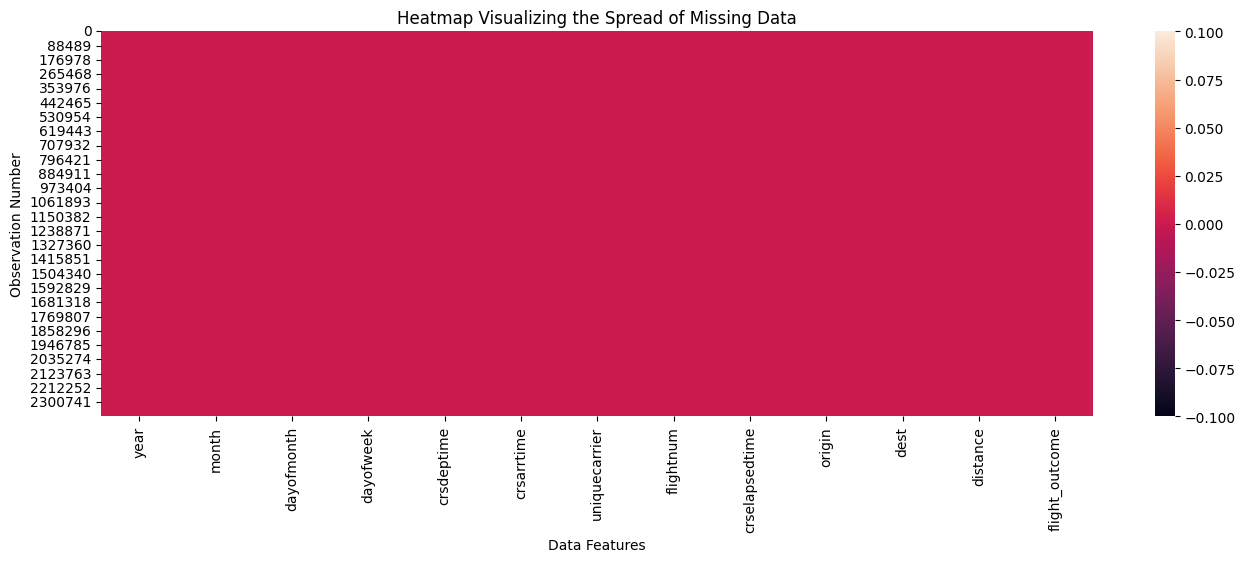

In [43]:
# Review new heatmap of missing values
review_missing_data( df_prep )

In [44]:
df_prep["flight_outcome"].value_counts(normalize=True)

flight_outcome
0   0.9707
1   0.0293
Name: proportion, dtype: float64

### 3.4 Create Training/Test Datasets

In [45]:
df_clean = df_prep.copy()
df_clean

,year,month,dayofmonth,dayofweek,crsdeptime,crsarrtime,uniquecarrier,flightnum,crselapsedtime,origin,dest,distance,flight_outcome
0,2008,1,3,4,1325,1435,WN,588,70.0000,HOU,LIT,393,0
1,2008,1,3,4,1120,1245,WN,1343,85.0000,HOU,MAF,441,0
2,2008,1,3,4,2015,2140,WN,3841,85.0000,HOU,MAF,441,0
3,2008,1,3,4,855,1205,WN,3,130.0000,HOU,MCO,848,0
4,2008,1,3,4,1400,1710,WN,25,130.0000,HOU,MCO,848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389212,2008,4,17,4,1025,1237,DL,1207,132.0000,BOS,CVG,752,0
2389213,2008,4,17,4,1320,1524,DL,1208,124.0000,CVG,BOS,752,0
2389214,2008,4,17,4,1335,1553,DL,1209,138.0000,BOS,CVG,752,0
2389215,2008,4,17,4,1935,2141,DL,1210,126.0000,CVG,BOS,752,0


***NOTE:*** 
Due to computing power limitations, for purposes of completing capstone project requirements, a fraction of the dataset is used to produce results.  
Ideally, a compute environment with sufficient capabilities would be used in modeling this larger dataset

In [46]:
# take a smaller sample to test modeling 
df_clean = df_clean.sample( frac = 0.4 )

In [47]:
X = df_clean.drop( ['flight_outcome'], axis=1)
y = df_clean['flight_outcome']
y.value_counts( normalize = True )

flight_outcome
0   0.9707
1   0.0293
Name: proportion, dtype: float64

In [48]:
# Create lists of categorical and numerical features:
cats = X.select_dtypes(include=["category"]).columns
nums = X.select_dtypes(exclude=["category"]).columns
cats, nums

(Index(['uniquecarrier', 'origin', 'dest'], dtype='object'),
 Index(['year', 'month', 'dayofmonth', 'dayofweek', 'crsdeptime', 'crsarrtime',
        'flightnum', 'crselapsedtime', 'distance'],
       dtype='object'))

In [49]:
# Create train/test sets, test size of 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

In [50]:
# Validate sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape, display(X_train.columns)

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'crsdeptime', 'crsarrtime',
       'uniquecarrier', 'flightnum', 'crselapsedtime', 'origin', 'dest',
       'distance'],
      dtype='object')

((668971, 12), (286703, 12), (668971,), (286703,), None)

In [51]:
# Gut-check distribution of classes is roughly equal for train and test sets
# The classes are imbalanced, so likely we'll need to evaluate sampling and sythethic approaches

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True) 

(flight_outcome
 0   0.9705
 1   0.0295
 Name: proportion, dtype: float64,
 flight_outcome
 0   0.9710
 1   0.0290
 Name: proportion, dtype: float64)

### 3.6 Feature Engineering
* Create a "default" dataset to set as a baseline for all classifier tests that has be scaled and binarized
* Final preparation work to address the class imbalance for target feature

In [52]:
# Binarize desired categorical features, and scale all desired numerical features
# for both train and test datasets

col_transformer = make_column_transformer(
                        ( OneHotEncoder( sparse_output = False, drop = 'if_binary' ), cats ), 
                        remainder = StandardScaler()
                )

X_train_eng = pd.DataFrame( 
                col_transformer.fit_transform( X_train ),
                columns = col_transformer.get_feature_names_out()
)

X_test_eng = pd.DataFrame( 
                col_transformer.fit_transform( X_test ),
                columns = col_transformer.get_feature_names_out()
)

### 3.5 Balancing the Target Class
* As demonstrated above, only 3% of the records indicate a flight change (`cancelled` or `diverted`)
* To avoid a bias towards the majority class, review different class balancing approaches to determine best performer
* Techniques:
    * Under-sampling
    * Over-sampling
    * Synthetic data
    * Weighted loss

#### 3.5.1 Under-sampling (RandomUnderSampler)

In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Run the under-sampler
under_sampler = RandomUnderSampler( sampling_strategy=0.5, random_state=42 )
X_undersampled, y_undersampled = under_sampler.fit_resample( X_train_eng, y_train )

# Review new class distribution
display( y_undersampled.value_counts( normalize=True ))
X_undersampled.shape, y_undersampled.shape

flight_outcome
0   0.6667
1   0.3333
Name: proportion, dtype: float64

((59106, 605), (59106,))

#### 3.5.2 Over-sampling (RandomOverSampler)

In [54]:
from imblearn.over_sampling import RandomOverSampler

# Run the over-sampler
over_sampler = RandomOverSampler( sampling_strategy=0.5, random_state=42 )
X_oversampled, y_oversampled = over_sampler.fit_resample( X_train_eng, y_train )

# Review new class distribution
display( y_oversampled.value_counts( normalize=True ))
X_oversampled.shape, y_oversampled.shape

flight_outcome
0   0.6667
1   0.3333
Name: proportion, dtype: float64

((973903, 605), (973903,))

#### 3.5.3 Synthetic data (SMOTE)

In [55]:
from imblearn.over_sampling import SMOTE

# Generate synthetic records
smote = SMOTE( sampling_strategy=0.5, random_state=42 )
X_synthetic, y_synthetic = smote.fit_resample( X_train_eng, y_train )

# Review new class distribution
display( y_synthetic.value_counts( normalize=True ))
X_synthetic.shape, y_synthetic.shape

flight_outcome
0   0.6667
1   0.3333
Name: proportion, dtype: float64

((973903, 605), (973903,))

#### 3.5.4 Class weighting with balancing
* Review the impact of using the above sampled or synthetic balancing techniques in combination with class weights.
* Evaluate trade-offs using a `classification_report`

In [56]:
from sklearn.metrics import classification_report

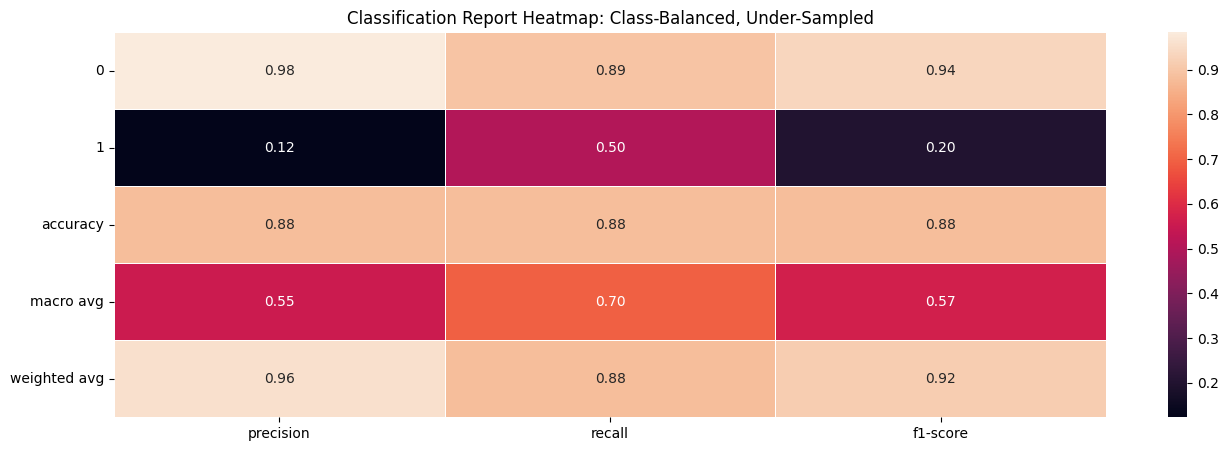

In [57]:
### Under-sampled Dataset ###

# Calculate class weights
class_weights = dict(zip([0, 1], (1 / y_undersampled.value_counts( normalize=True )).to_dict().values()))

# Use class weights in the model
model = RandomForestClassifier( class_weight=class_weights, random_state=42 )
model.fit( X_undersampled, y_undersampled )

# Evaluate the model
y_pred = model.predict( X_test_eng )

# Review results and plot them
undersampled_report = classification_report( y_test, y_pred, output_dict=True )
df_undersampled = pd.DataFrame(undersampled_report).transpose()

# Plot the precision, recall, and F1-score using seaborn
sns.heatmap( df_undersampled[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", linewidths=.5 )
plt.title( 'Classification Report Heatmap: Class-Balanced, Under-Sampled' )
plt.savefig( f'images/capstone-class-imbalance-plot-under-sampled.png' )
plt.show()

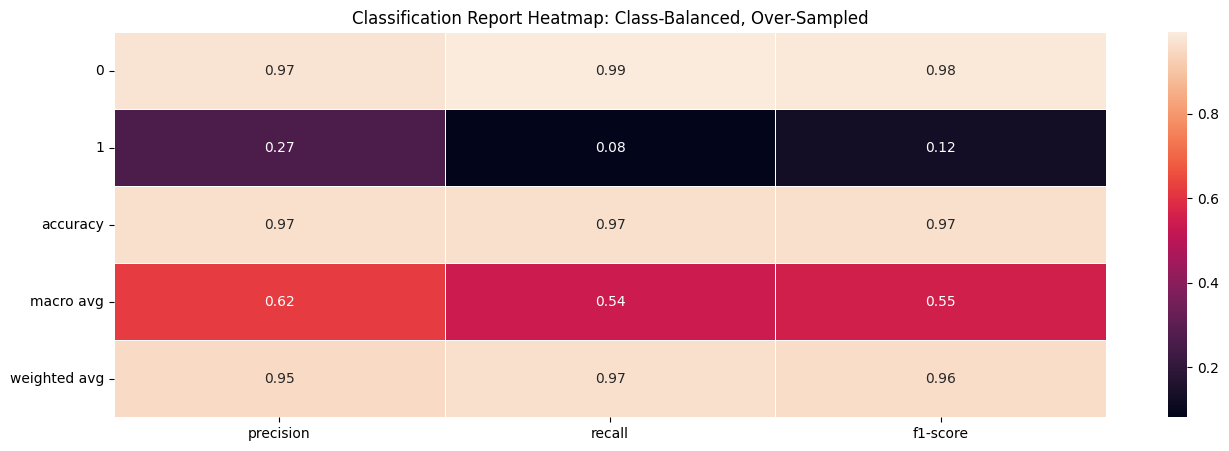

In [58]:
### Over-sampled Dataset ###

# Calculate class weights
class_weights = dict(zip([0, 1], (1 / y_oversampled.value_counts( normalize=True )).to_dict().values()))

# Use class weights in the model
model = RandomForestClassifier( class_weight=class_weights, random_state=42 )
model.fit( X_oversampled, y_oversampled )

# Evaluate the model
y_pred = model.predict( X_test_eng )

# Review results and plot them
oversampled_report = classification_report( y_test, y_pred, output_dict=True )
df_oversampled = pd.DataFrame(oversampled_report).transpose()

# Plot the precision, recall, and F1-score using seaborn
sns.heatmap( df_oversampled[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", linewidths=.5 )
plt.title( 'Classification Report Heatmap: Class-Balanced, Over-Sampled' )
plt.savefig( f'images/capstone-class-imbalance-plot-over-sampled.png' )
plt.show()

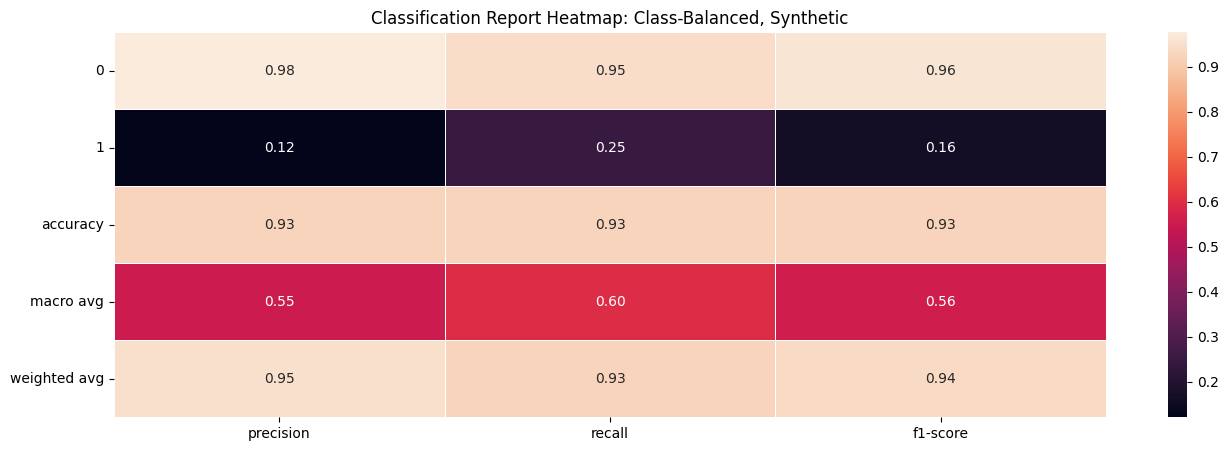

In [59]:
### Synthetic Dataset ###

# Calculate class weights
class_weights = dict(zip([0, 1], (1 / y_synthetic.value_counts( normalize=True )).to_dict().values()))

# Use class weights in the model
model = RandomForestClassifier( class_weight=class_weights )
model.fit( X_synthetic, y_synthetic )

# Evaluate the model
y_pred = model.predict( X_test_eng )

# Review results and plot them
synthetic_report = classification_report( y_test, y_pred, output_dict=True )
df_synthetic = pd.DataFrame(synthetic_report).transpose()

# Plot the precision, recall, and F1-score using seaborn
sns.heatmap( df_synthetic[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", linewidths=.5 )
plt.title( 'Classification Report Heatmap: Class-Balanced, Synthetic' )
plt.savefig( f'images/capstone-class-imbalance-plot-synthetic.png' )
plt.show()

#### 3.5.5 Selected balanced dataset
Evaluate which seemed more viable based on above review to use as the training set for the following models.

In [60]:
# Precision seems more important, as it seems more economically relevant for airlines to fill flights when not likely to incur a flight change
X_train_eng = X_oversampled
y_train = y_oversampled

display( y_train.value_counts( normalize=True ))
X_train_eng.shape, y_train.shape

flight_outcome
0   0.6667
1   0.3333
Name: proportion, dtype: float64

((973903, 605), (973903,))

In [61]:
# store the class-balanced training set variables for future use in case of kernel crash
%store X_train_eng y_train X_test_eng y_test


Stored 'X_train_eng' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_test_eng' (DataFrame)
Stored 'y_test' (Series)


<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">4.0 General Initial Models</h2>

Use multiple regression models 
* Dummy Classifier (baseline)
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Support Vector Machines
* RandomForest Decision Tree

Evaluate on:
* Loss
* Scoring

### 4.1 Model Performance Metrics Dataframe


In [62]:
# Retrieve the stored variables for engineered and balanced training set
%store -r X_train_eng
%store -r y_train
X_train_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973903 entries, 0 to 973902
Columns: 605 entries, onehotencoder__uniquecarrier_9E to remainder__distance
dtypes: float64(605)
memory usage: 4.4 GB


In [63]:
results_df = pd.DataFrame( columns=['classifier', 'scoring', 'train score', 'test score', 'train mse', 'test mse', 'cv time', 'average fit time', 'best params'] )
results_df

,classifier,scoring,train score,test score,train mse,test mse,cv time,average fit time,best params


### 4.2 Establish a Baseline Model

In [64]:
# Use sklearn's DummyClassifier() model to baseline classification performance

# Train and fit dummy model
clf_bl = DummyClassifier()

# start the clock to understand fit time
start_time = time.time()
clf_bl.fit( X_train_eng, y_train )
bl_fit = time.time() - start_time

# Train and Test scores
bl_train_score = clf_bl.score( X_train_eng, y_train )
bl_test_score = clf_bl.score( X_test_eng, y_test )

# Train and Test MSEs
bl_train_mse = mean_squared_error( clf_bl.predict( X_train_eng ), y_train )
bl_test_mse = mean_squared_error( clf_bl.predict( X_test_eng ), y_test )

print(
    "\nBaseline values:\n------------------"
    f"\nFit Time:\t{bl_fit:.4f} seconds"
    f"\nTraining Set:\tScore: {bl_train_score:.4f} \t MSE: {bl_train_mse:.4f}"
    f"\nTest Set:\tScore: {bl_test_score:.4f} \t MSE: {bl_test_mse:.4f}"
)

# Retain baseline metrics
results_df.loc["baseline"] = ["Dummy Classifier", "", round(bl_train_score, 4), round(bl_test_score, 4), 
                              round(bl_train_mse, 4), round(bl_test_mse, 4), "", round(bl_fit, 4), ""]


Baseline values:
------------------
Fit Time:	0.0210 seconds
Training Set:	Score: 0.6667 	 MSE: 0.3333
Test Set:	Score: 0.9710 	 MSE: 0.0290


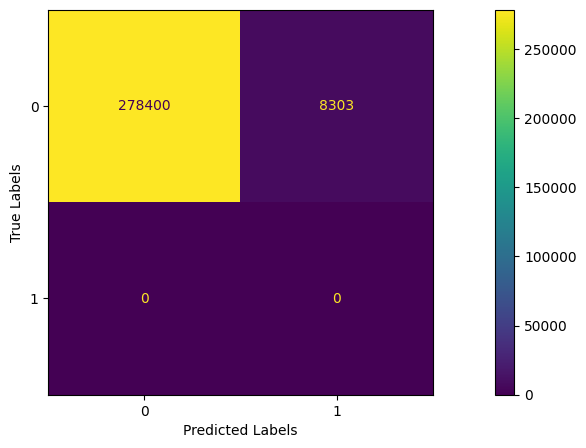

(278400, 8303, 0, 0)

In [65]:
tn, fp, fn, tp = evaluate_confusion_matrix( y_test, clf_bl.predict( X_test ) )
tn, fp, fn, tp

### 4.3 Logistic Regression (Default)
Using the engineered dataset (categorical features binarized, numerical features scaled)

#### 4.3.1 Default Modeling and Scoring

In [66]:
clf_lgr = LogisticRegression( class_weight='balanced', max_iter=1000 )

# start the clock to understand fit time
start_time = time.time()
clf_lgr.fit( X_train_eng, y_train )
lgr_fit = time.time() - start_time

lgr_train_score = clf_lgr.score( X_train_eng, y_train )
lgr_test_score = clf_lgr.score( X_test_eng, y_test )

# Train and Test MSEs
lgr_train_mse = mean_squared_error( clf_lgr.predict( X_train_eng ), y_train )
lgr_test_mse = mean_squared_error( clf_lgr.predict( X_test_eng ), y_test )

print(
    "\nBaseline values:\n------------------"
    f"\nFit Time:\t{lgr_fit:.4f} seconds"
    f"\nTraining Set:\tScore: {lgr_train_score:.4f} \t MSE: {lgr_train_mse:.4f}"
    f"\nTest Set:\tScore: {lgr_test_score:.4f} \t MSE: {lgr_test_mse:.4f}"
)

# Retain baseline metrics
results_df.loc["LGR - default"] = ["Logistic Regression", "", round(lgr_train_score, 4), round(lgr_test_score, 4), 
                              round(lgr_train_mse, 4), round(lgr_test_mse, 4), "", round(lgr_fit, 4), ""]


Baseline values:
------------------
Fit Time:	220.5126 seconds
Training Set:	Score: 0.6786 	 MSE: 0.3214
Test Set:	Score: 0.6682 	 MSE: 0.3318


#### 4.3.2 Important Feature Review
Taking a look at the coefficients to understand which features the model found had the most predictive power

In [67]:
lgr_coefs = pd.DataFrame( clf_lgr.coef_, columns=X_train_eng.columns) \
            .T.reset_index().rename(columns={0: 'coef', 'index': 'features'})
lgr_coefs['abs_coef'] = abs( lgr_coefs['coef'] )
lgr_coefs.sort_values('abs_coef', inplace=True, ascending=False )
lgr_coefs['features'] = lgr_coefs['features'].apply( sanitize_coef_labels )
lgr_coefs.head(25)

# Store LGR coefficients
%store lgr_coefs

lgr_coefs

Stored 'lgr_coefs' (DataFrame)


,features,coef,abs_coef
272,origin_SJT,-3.9176,3.9176
406,dest_FCA,-3.2409,3.2409
443,dest_IPL,-3.0460,3.0460
344,dest_BQK,-2.6697,2.6697
285,origin_SUN,2.5292,2.5292
...,...,...,...
557,dest_SHV,-0.0017,0.0017
410,dest_FNT,-0.0016,0.0016
473,dest_MCI,0.0011,0.0011
360,dest_CHA,0.0007,0.0007


### 4.4 K-Nearest Neighbors (abandoned)
Using the same engineered dataset, test a KNN model with default settings.

#### 4.4.1 Default Modeling and Scoring 

In [68]:
# clf_knn = KNeighborsClassifier()

# # start the clock to understand fit time
# start_time = time.time()
# clf_knn.fit( X_train_eng, y_train )
# knn_fit = time.time() - start_time



In [69]:
# # Train and Test scores
# knn_train_score = clf_knn.score( np.ascontiguousarray( X_train_eng.values ), y_train )
# knn_test_score = clf_knn.score( np.ascontiguousarray( X_test_eng.values ), y_test )

In [70]:
# Train and Test MSEs
#knn_train_mse = mean_squared_error( clf_knn.predict( np.ascontiguousarray( X_train_eng )), y_train )
#knn_test_mse = mean_squared_error( clf_knn.predict( X_test_eng ), y_test )

In [71]:
# print(
#     "\nBaseline values:\n------------------"
#     f"\nFit Time:\t{knn_fit:.4f} seconds"
#     f"\nTraining Set:\tScore: {knn_train_score:.4f} \t MSE: {knn_train_mse:.4f}"
#     f"\nTest Set:\tScore: {knn_test_score:.4f} \t MSE: {knn_test_mse:.4f}"
# )

# # Retain baseline metrics
# results_df.loc["KNN - default"] = ["K-Nearest Neighbors", "", round(knn_train_score, 4), round(knn_test_score, 4), 
#                               round(knn_train_mse, 4), round(knn_test_mse, 4), "", round(knn_fit, 4), ""]

#### 4.4.2 Important Feature Review

In [72]:
# knn_coefs = pd.DataFrame( clf_knn.coef_, columns=X_train_eng.columns) \
#             .T.reset_index().rename(columns={0: 'coef', 'index': 'features'})
# knn_coefs['abs_coef'] = abs( knn_coefs['coef'] )
# knn_coefs.sort_values('abs_coef', inplace=True, ascending=False )
# knn_coefs['features'] = knn_coefs['features'].apply( sanitize_coef_labels )
# knn_coefs.head(25)

# # store KNN coeficients
# %store knn_coefs

# knn_coefs

***NOTE:*** K-Nearest Neighbors Classifier kept getting stuck, abandoning this model for now.

### 4.5 Decision Tree
Using the same engineered dataset, test a Decision Tree model with default settings, except for indicating the `class_weight` parameter

#### 4.5.1 Default Modeling and Scoring 

In [73]:
clf_dt = DecisionTreeClassifier( class_weight='balanced' )

# start the clock to understand fit time
start_time = time.time()
clf_dt.fit( X_train_eng, y_train )
dt_fit = time.time() - start_time

# Train and Test scores
dt_train_score = clf_dt.score( X_train_eng, y_train )
dt_test_score = clf_dt.score( X_test_eng, y_test )

# Train and Test MSEs
dt_train_mse = mean_squared_error( clf_dt.predict( X_train_eng ), y_train )
dt_test_mse = mean_squared_error( clf_dt.predict( X_test_eng ), y_test )

print(
    "\nBaseline values:\n------------------"
    f"\nFit Time:\t{dt_fit:.4f} seconds"
    f"\nTraining Set:\tScore: {dt_train_score:.4f} \t MSE: {dt_train_mse:.4f}"
    f"\nTest Set:\tScore: {dt_test_score:.4f} \t MSE: {dt_test_mse:.4f}"
)
results_df

# Retain baseline metrics
results_df.loc["DT - default"] = ["Decision Tree", "", round(dt_train_score, 4), round(dt_test_score, 4), 
                              round(dt_train_mse, 4), round(dt_test_mse, 4), "", round(dt_fit, 4), ""]


Baseline values:
------------------
Fit Time:	31.0838 seconds
Training Set:	Score: 1.0000 	 MSE: 0.0000
Test Set:	Score: 0.9507 	 MSE: 0.0493


#### 4.5.2 Important Feature Review

In [74]:
# Get feature importances
dt_feature_importances = clf_dt.feature_importances_

# Create a DataFrame to display feature importances
dt_coefs = pd.DataFrame({'Feature': X_train_eng.columns, 'Importance': dt_feature_importances })
dt_coefs = dt_coefs.sort_values(by='Importance', ascending=False)

# store DT important features
%store dt_coefs

dt_coefs

Stored 'dt_coefs' (DataFrame)


,Feature,Importance
598,remainder__dayofmonth,0.1310
602,remainder__flightnum,0.1309
601,remainder__crsarrtime,0.0748
604,remainder__distance,0.0692
599,remainder__dayofweek,0.0663
...,...,...
365,onehotencoder__dest_CLD,0.0000
371,onehotencoder__dest_CMX,0.0000
377,onehotencoder__dest_CSG,0.0000
126,onehotencoder__origin_GCC,0.0000


### 4.6 Support Vector Machines (abandoned)
Using the same engineered dataset, test a SVM model with default settings.
This model was abandoned as it was taking too long to fit

#### 4.6.1 Default Modeling and Scoring 

In [75]:
# clf_svm = SVC( class_weight='balanced', verbose = True )

# # start the clock to understand fit time
# start_time = time.time()
# clf_svm.fit( X_train_eng, y_train )
# svm_fit = time.time() - start_time



In [76]:
# # Train and Test scores
# svm_train_score = clf_svm.score( X_train_eng, y_train )
# svm_test_score = clf_svm.score( X_test_eng, y_test )



In [77]:
# # Train and Test MSEs
# svm_train_mse = mean_squared_error( clf_svm.predict( X_train_eng ), y_train )
# svm_test_mse = mean_squared_error( clf_svm.predict( X_test_eng ), y_test )



In [78]:
# print(
#     "\nBaseline values:\n------------------"
#     f"\nFit Time:\t{svm_fit:.4f} seconds"
#     f"\nTraining Set:\tScore: {svm_train_score:.4f} \t MSE: {svm_train_mse:.4f}"
#     f"\nTest Set:\tScore: {svm_test_score:.4f} \t MSE: {svm_test_mse:.4f}"
# )

# # Retain baseline metrics
# results_df.loc["DT - default"] = ["Decision Tree", "", round(svm_train_score, 4), round(svm_test_score, 4), 
#                               round(svm_train_mse, 4), round(svm_test_mse, 4), "", round(svm_fit, 4), ""]

#### 4.6.2 Important Feature Review

In [79]:
# svm_coefs = pd.DataFrame( clf_svm.coef_, columns=X_train_eng.columns) \
#             .T.reset_index().rename(columns={0: 'coef', 'index': 'features'})
# svm_coefs['abs_coef'] = abs( svm_coefs['coef'] )
# svm_coefs.sort_values('abs_coef', inplace=True, ascending=False )
# svm_coefs['features'] = svm_coefs['features'].apply( sanitize_coef_labels )
# svm_coefs.head(25)

### 4.7 Random Forest
Using the same engineered dataset, test a Random Forest model with default settings.

#### 4.6.1 Default Modeling and Scoring 

In [80]:
clf_rf = RandomForestClassifier( class_weight='balanced' )

# start the clock to understand fit time
start_time = time.time()
clf_rf.fit( X_train_eng, y_train )
rf_fit = time.time() - start_time

# Train and Test scores
rf_train_score = clf_rf.score( X_train_eng, y_train )
rf_test_score = clf_rf.score( X_test_eng, y_test )

# Train and Test MSEs
rf_train_mse = mean_squared_error( clf_rf.predict( X_train_eng ), y_train )
rf_test_mse = mean_squared_error( clf_rf.predict( X_test_eng ), y_test )

print(
    "\nBaseline values:\n------------------"
    f"\nFit Time:\t{rf_fit:.4f} seconds"
    f"\nTraining Set:\tScore: {rf_train_score:.4f} \t MSE: {rf_train_mse:.4f}"
    f"\nTest Set:\tScore: {rf_test_score:.4f} \t MSE: {rf_test_mse:.4f}"
)

# Retain baseline metrics
results_df.loc["RF - default"] = ["Random Forest", "", round(rf_train_score, 4), round(rf_test_score, 4), 
                              round(rf_train_mse, 4), round(rf_test_mse, 4), "", round(rf_fit, 4), ""]


Baseline values:
------------------
Fit Time:	293.7955 seconds
Training Set:	Score: 1.0000 	 MSE: 0.0000
Test Set:	Score: 0.9671 	 MSE: 0.0329


#### 4.5.2 Important Feature Review

In [81]:
# Get feature importances
rf_feature_importances = clf_rf.feature_importances_

# Create a DataFrame to display feature importances
rf_coefs = pd.DataFrame({'Feature': X_train_eng.columns, 'Importance': rf_feature_importances })
rf_coefs = rf_coefs.sort_values(by='Importance', ascending=False)

rf_coefs

,Feature,Importance
598,remainder__dayofmonth,0.1422
599,remainder__dayofweek,0.0910
602,remainder__flightnum,0.0888
601,remainder__crsarrtime,0.0785
600,remainder__crsdeptime,0.0752
...,...,...
181,onehotencoder__origin_LWS,0.0000
563,onehotencoder__dest_SLE,0.0000
198,onehotencoder__origin_MKG,0.0000
315,onehotencoder__dest_ADK,0.0000


<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">5.0 Model Evaluation and Improvement</h2>

Through cross-validation techniques, identify the best hyperparameters per regression model, to improve model scoring and selection

### 5.1 Setup Transformations

In [82]:
# Retreive variables (in case kernel crashed)
%store -r X_train_eng X_test_eng y_train y_test


### 5.2 Setup pipeline and hyperparameters by classifier

In [83]:
modelConfigurations = {
    # Logistic Regression configurations
    'lgr': {
        'label': 'Logistic Regression',
        'pipe': Pipeline ([
                    ('clf', LogisticRegression(class_weight='balanced', max_iter = 1500))
                ]),
        'params': {
                    'clf__C': [0.01, 0.1, 1, 10, 100],
                    'clf__solver': ['liblinear', 'newton-cg', 'sag']
                }
    },
    # Decision Tree configurations
    'dtree': {
        'label': 'Decision Tree',
        'pipe': Pipeline ([
                    #('trans', improve_pipe),
                    ('clf', DecisionTreeClassifier( class_weight='balanced' ))
                ]),
        'params': {
                 'clf__min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                 'clf__max_depth': [2, 5, 10],
                 'clf__min_samples_split': [0.1, 0.2, 0.05]
                }
    },
    # Random Forest configurations
    'rf': {
        'label': 'Random Forest',
        'pipe': Pipeline ([
                    #('trans', improve_pipe),
                    ('clf', RandomForestClassifier( class_weight='balanced' ))
                ]),
        'params': {
                 'clf__n_estimators': [50, 100, 200],
                 'clf__max_depth': [2, 5, 10],
                 'clf__min_samples_split': [0.1, 0.2, 0.05],
                 'clf__criterion': ['gini', 'entropy']
                }
    },
    # K-Nearest Neighbors
    'knn': {
        'label': 'K-Nearest Neighbors',
        'pipe': Pipeline ([
                    #('trans', improve_pipe),
                    ('clf', KNeighborsClassifier())
                ]),
        'params': { 
                    'clf__n_neighbors': list(range(3, 23, 2)),
                    'clf__weights': ['uniform', 'distance'],
                    'clf__p': [1, 2, 3, 4]           
                }
    },
    # Support Vector Machine configurations
    'svm': {
        'label': 'Support Vector Machines',
        'pipe': Pipeline ([
                    #('trans', improve_pipe),
                    ('clf', SVC(class_weight='balanced'))
                ]),
        'params': { 
                    'clf__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
                    'clf__gamma': [0.1, 1.0, 10.0]
                 }
    }
}

### 5.3 Cross-validation and Optimization

In [84]:
'''
Using a set of custom functions, iterate through each classifier to determine it's best performing
hyperparameters and performance metrics (functions in 2.3.5 Custom Functions)

As indicated above, the KNN and SVM models seemed to not be functioning well, 
as such, they are removed from this optimization review
'''

test_models( X_train_eng, X_test_eng, y_train, y_test, "All Features", ['lgr', 'dtree', 'rf'] )



Starting grid search for 'Logistic Regression' using 'precision' scoring... 


/Users/ameet/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/ameet/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/ameet/Library/Python/3.9/lib/python/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Stored 'results_df' (DataFrame)
 ... DONE! (29408.973656892776 seconds) 
Model: Logistic Regression 
Scorer: precision 
Train Score: 0.6785 
Test Score: 0.6684 
Train MSE: 0.3215 
Test MSE: 0.3316 
Fit Time: 9793.4083 
Best Params: {'clf__C': 0.1, 'clf__solver': 'liblinear'}


Starting grid search for 'Decision Tree' using 'precision' scoring... 


/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ameet/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_cl

Stored 'results_df' (DataFrame)
 ... DONE! (440.1398649215698 seconds) 
Model: Decision Tree 
Scorer: precision 
Train Score: 0.5793 
Test Score: 0.5209 
Train MSE: 0.4207 
Test MSE: 0.4791 
Fit Time: 127.5745 
Best Params: {'clf__max_depth': 2, 'clf__min_impurity_decrease': 0.01, 'clf__min_samples_split': 0.1}


Starting grid search for 'Random Forest' using 'precision' scoring... 
Stored 'results_df' (DataFrame)
 ... DONE! (3749.6498980522156 seconds) 
Model: Random Forest 
Scorer: precision 
Train Score: 0.6646 
Test Score: 0.6555 
Train MSE: 0.3354 
Test MSE: 0.3445 
Fit Time: 1159.1538 
Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 100}


In [85]:
results_df

,classifier,scoring,train score,test score,train mse,test mse,cv time,average fit time,best params
baseline,Dummy Classifier,,0.6667,0.9710,0.3333,0.0290,,0.0210,
LGR - default,Logistic Regression,,0.6786,0.6682,0.3214,0.3318,,220.5126,
DT - default,Decision Tree,,1.0000,0.9507,0.0000,0.0493,,31.0838,
RF - default,Random Forest,,1.0000,0.9671,0.0000,0.0329,,293.7955,
lgr - precision,Logistic Regression,precision,0.6785,0.6684,0.3215,0.3316,29408.9737,9793.4083,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}"
dtree - precision,Decision Tree,precision,0.5793,0.5209,0.4207,0.4791,440.1399,127.5745,"{'clf__max_depth': 2, 'clf__min_impurity_decre..."
rf - precision,Random Forest,precision,0.6646,0.6555,0.3354,0.3445,3749.6499,1159.1538,"{'clf__criterion': 'entropy', 'clf__max_depth'..."


In [86]:
# Relative fit times between classifier model + scoring algorithm
fit = results_df["average fit time"]
results_df["relative fit time"] = fit / fit.sum()

# Scoring error (difference between train and test scores)
results_df["scoring error"] = np.abs( results_df["train score"] - results_df["test score"] )

# view results sorted by Scoring Error, and Relative Fit Time
results_df.sort_values(by=["scoring error", "relative fit time"], inplace=True)

# Save the results to CSV for offline review
results_df.to_csv("results/capstone-improving-classifier-performance.csv", index=False)

results_df

,classifier,scoring,train score,test score,train mse,test mse,cv time,average fit time,best params,relative fit time,scoring error
rf - precision,Random Forest,precision,0.6646,0.6555,0.3354,0.3445,3749.6499,1159.1538,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.0997,0.0091
lgr - precision,Logistic Regression,precision,0.6785,0.6684,0.3215,0.3316,29408.9737,9793.4083,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}",0.8424,0.0101
LGR - default,Logistic Regression,,0.6786,0.6682,0.3214,0.3318,,220.5126,,0.0190,0.0104
RF - default,Random Forest,,1.0000,0.9671,0.0000,0.0329,,293.7955,,0.0253,0.0329
DT - default,Decision Tree,,1.0000,0.9507,0.0000,0.0493,,31.0838,,0.0027,0.0493
dtree - precision,Decision Tree,precision,0.5793,0.5209,0.4207,0.4791,440.1399,127.5745,"{'clf__max_depth': 2, 'clf__min_impurity_decre...",0.0110,0.0584
baseline,Dummy Classifier,,0.6667,0.9710,0.3333,0.0290,,0.0210,,0.0000,0.3043


In [88]:
%store results_df

Stored 'results_df' (DataFrame)


IndexError: index 3 is out of bounds for axis 0 with size 3

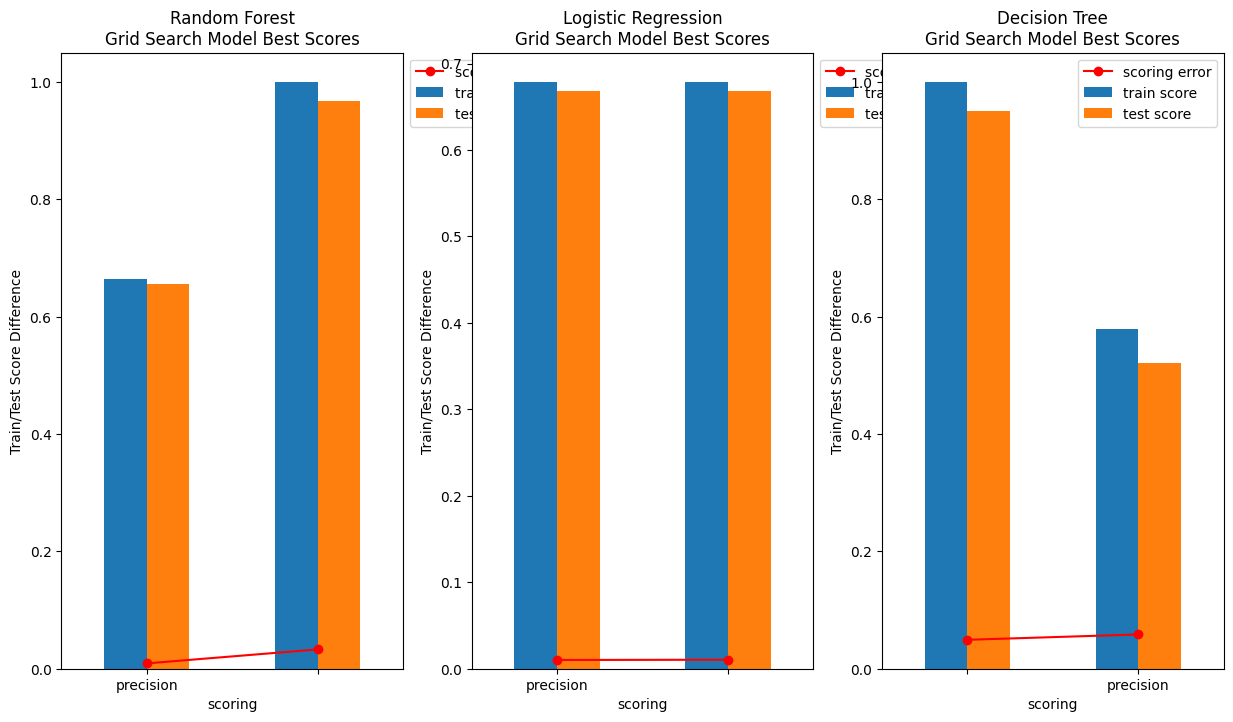

In [89]:
# Classifier model scoring by algorithm
clfs = results_df["classifier"].unique()

results_df["scoring error"] = np.abs( results_df["train score"] - results_df["test score"] )

fig, ax = plt.subplots(1,3,figsize=(15,8))
axe = ax.ravel()
ind = 0
for clf in clfs:
    results_df.query("classifier == @clf").plot(
            x='scoring', 
            y=["train score", "test score"],
            #y = 'scoring error',
            kind='bar',  
            rot=15,
            title=f'{clf}\nGrid Search Model Best Scores',
            ylabel='Train/Test Score Difference',
            xlabel='Grid Search Scoring Algorithms',
            ax=axe[ind]
        )
    results_df.query("classifier == @clf").plot(
            x='scoring', 
            y = 'scoring error',
            kind='line',  
            ax=axe[ind],
            linestyle='-', 
            marker='o',
            color='red'
        )
    axe[ind].legend( bbox_to_anchor =(1 ,1))
    ind += 1

plt.suptitle('Improving the Model\nBest Model Scores by Scoring Algorithm, per Classifier\n\n')
plt.legend()
fig.tight_layout()

# Save figure for use in write-up, as needed
plt.savefig(f'images/capstone-results-best-performance-metric-by-classifier.png')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


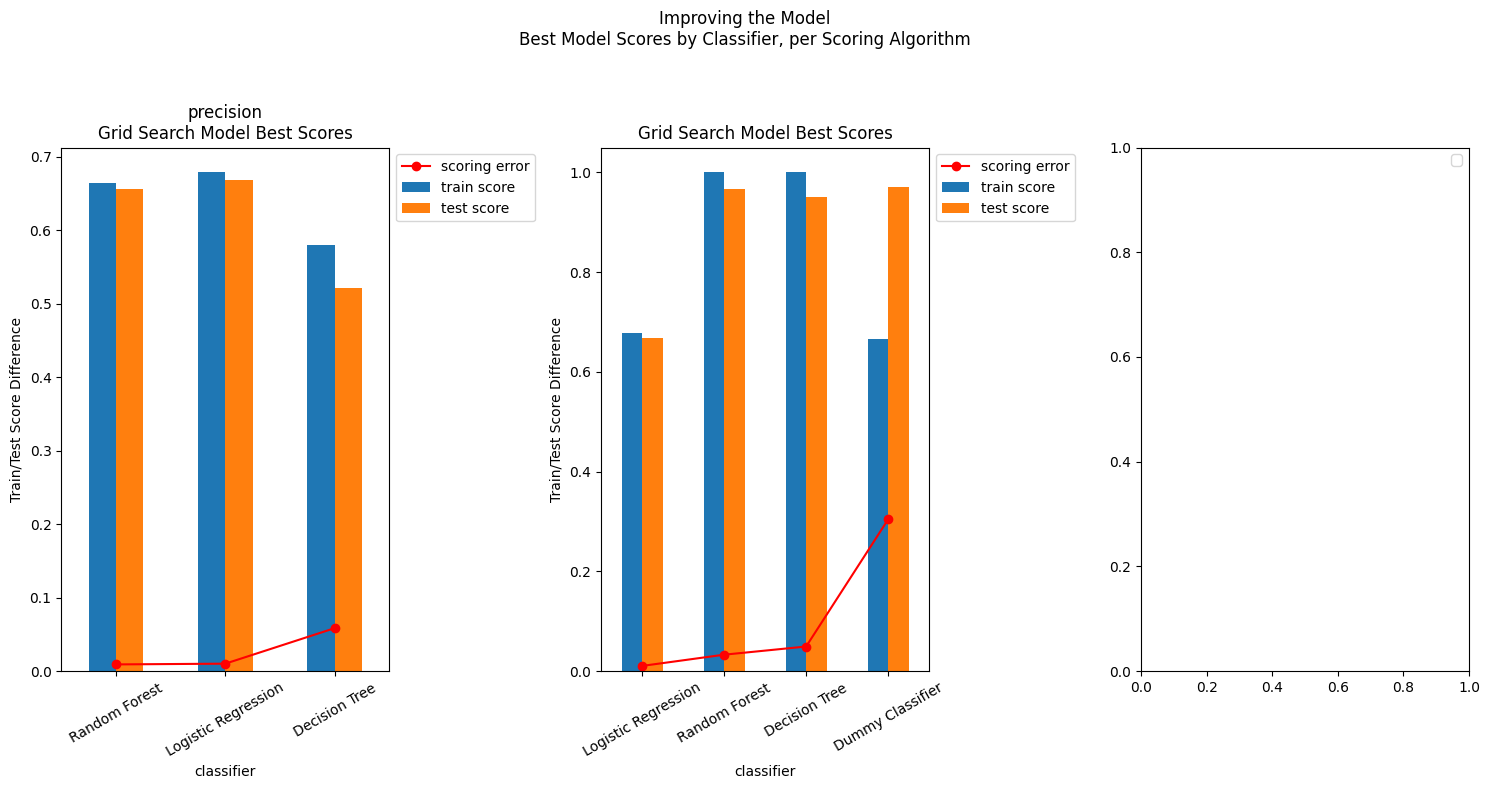

In [90]:
# Classifier model scoring by scorer
scorers = results_df["scoring"].unique()


fig, ax = plt.subplots(1,3,figsize=(15,8))
axe = ax.ravel()
ind = 0
for scorer in scorers:
    scoring = results_df.query("scoring == @scorer").copy()
    scoring.plot(
            x='classifier', 
            y=["train score", "test score"],
            kind='bar',  
            title=f'{scorer}\nGrid Search Model Best Scores',
            ylabel='Train/Test Score Difference',
            xlabel='Grid Search Classifier Models',
            ax=axe[ind]
        )
    scoring.plot(
            x='classifier', 
            y = 'scoring error',
            kind='line',  
            ax=axe[ind],
            linestyle='-', 
            marker='o',
            color='red'
        )
    axe[ind].legend( bbox_to_anchor =(1 ,1))
    axe[ind].set_xticklabels(scoring["classifier"], rotation=30)
    ind += 1

plt.suptitle('Improving the Model\nBest Model Scores by Classifier, per Scoring Algorithm\n\n')
plt.legend()
fig.tight_layout()

# Save figure for use in write-up, as needed
plt.savefig(f'images/capstone-results-best-scores-by-classifier.png')

plt.show()